# Predicting Audience Ratings: A Comprehensive Machine Learning Workflow

You can find the code and the repository for this project on [GitHub](https://github.com/Elamathi12/audience_rating_model).

In this notebook, we explore an end-to-end machine learning pipeline for predicting audience ratings of movies based on various features. The notebook follows these key steps:

1. **Data Preprocessing**:
   - We handle missing values in both categorical and numerical features, ensuring the dataset is ready for modeling

2. **Feature Engineering**:
   - To enhance the predictive power of the models, we perform feature engineering by generating vectorized representations for text-based columns and breaking down multi-valued categorical columns into binary indicator columns.

3. **Model Selection and Training**:
   - A diverse set of regression models are trained, including Random Forest, Gradient Boosting, AdaBoost, Linear Regression, and more. Each model is evaluated using standard metrics such as Mean Squared Error (MSE), R-squared (R2), and Mean Absolute Error (MAE).

4. **Model Evaluation**:
   - The models are evaluated to determine which provides the best balance between bias and variance. Cross-validation is employed to validate the performance of the best model.
   - The model performance is visualized to facilitate easy comparison and interpretation.

5. **Feature Importance Analysis**:
   - For tree-based models, we calculate and visualize the importance of features to understand which variables contribute most significantly to the model's predictions.

6. **Results and Conclusion**:
   - The best model is selected based on its R2 score, providing the most accurate predictions for audience ratings. Insights into model performance are summarized, offering a clear understanding of the most influential features in the dataset.

This notebook serves as a practical guide to building and evaluating regression models in a real-world setting.


# Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

# Loading Dataset

In [3]:
# Load the Rotten Tomatoes Movie Dataset from a CSV file into a pandas DataFrame
# Replace the file path with your desired location if needed
audience_data = pd.read_csv('/content/Rotten_Tomatoes_Movies3.csv')

# Exploratory Data Analysis

**Data Preprocessing**

In [4]:
# Displaying the first five rows of the DataFrame
# This provides a quick glimpse of the dataset, including column names and sample data
audience_data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",12-02-2010,29-06-2010,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",30-04-2010,19-10-2010,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",05-10-1979,27-08-1997,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",13-04-1957,06-03-2001,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",01-01-1954,20-05-2003,127.0,Disney,Fresh,89,27,74.0


In [5]:
#Find Shape of Our Dataset (Number of Rows And Number of Columns)
audience_data.shape

(16638, 16)

In [6]:
# Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
audience_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

In [7]:
# checking for null values
audience_data.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


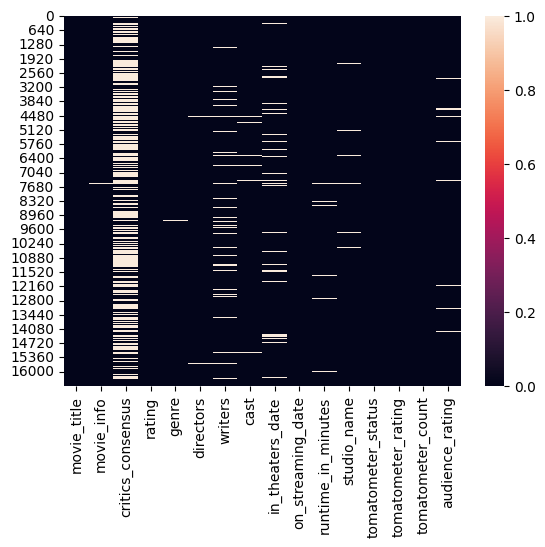

In [8]:
# Visualizing missing values in the dataset using a heatmap
# sns.heatmap() creates a visual representation of null values in the DataFrame
sns.heatmap(audience_data.isnull())

# Displaying the plot
plt.show()

In [9]:
#Check Proportion of Missing Data
missing_percentage = (audience_data.isnull().sum() / len(audience_data)) * 100
print(missing_percentage.sort_values(ascending=False))

critics_consensus     50.060103
writers                8.107946
in_theaters_date       4.898425
studio_name            2.500301
cast                   1.706936
audience_rating        1.514605
runtime_in_minutes     0.931602
directors              0.685179
movie_info             0.144248
genre                  0.102176
on_streaming_date      0.012021
movie_title            0.000000
rating                 0.000000
tomatometer_status     0.000000
tomatometer_rating     0.000000
tomatometer_count      0.000000
dtype: float64


In [10]:
# Calculate median for numerical columns
median_runtime = audience_data['runtime_in_minutes'].median()
median_rating = audience_data['audience_rating'].median()

In [11]:
# Drop columns with too many missing values
audience_data.drop(['critics_consensus'], axis=1, inplace=True)
audience_data['runtime_in_minutes'] = audience_data['runtime_in_minutes'].fillna(median_runtime)
audience_data['audience_rating'] = audience_data['audience_rating'].fillna(median_rating)
audience_data=audience_data.dropna(axis=0)

In [12]:
#check for duplicate data
dup_data=audience_data.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

Are there any duplicated values in data? False


In [13]:
#Get Overall Statistics About The DataFrame
audience_data.describe()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,14311.000000,14311.000000,14311.000000,14311.000000
mean,103.553979,58.789253,61.825030,60.031514
std,25.419898,28.540259,69.105504,20.293184
min,1.000000,0.000000,5.000000,0.000000
25%,91.000000,36.000000,14.000000,44.000000
50%,100.000000,63.000000,32.000000,62.000000
75%,112.000000,84.000000,88.000000,77.000000
max,2000.000000,100.000000,497.000000,100.000000


In [14]:
#Display Title of The Movie Having Runtime >= 300 Minutes
audience_data[audience_data['runtime_in_minutes']>=300]['movie_title']

,movie_title
913,Love on the Run
1844,1900 (Novecento)
4104,Carlos
10372,Never Sleep Again: The Elm Street Legacy
13539,Terror Tract


**Visualizing Audience Rating Distribution**

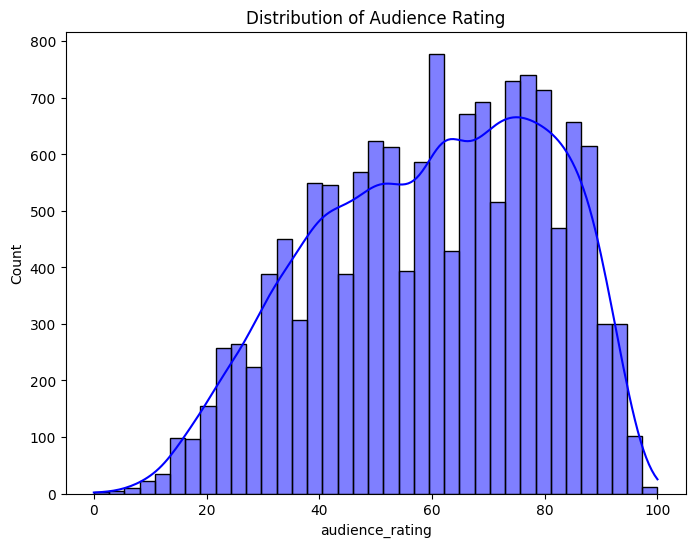

In [15]:
# Adjusting the figure size for better visualization
plt.figure(figsize=(8, 6))

# Plotting the distribution of the 'audience_rating' column
# sns.histplot creates a histogram with a Kernel Density Estimate (KDE) overlay for smoother visualization
sns.histplot(audience_data['audience_rating'], kde=True, color='blue')

# Adding a title to the plot for clarity
plt.title('Distribution of Audience Rating')

# Displaying the plot
plt.show()

**Visualizing Number of Movies by Year of Release**

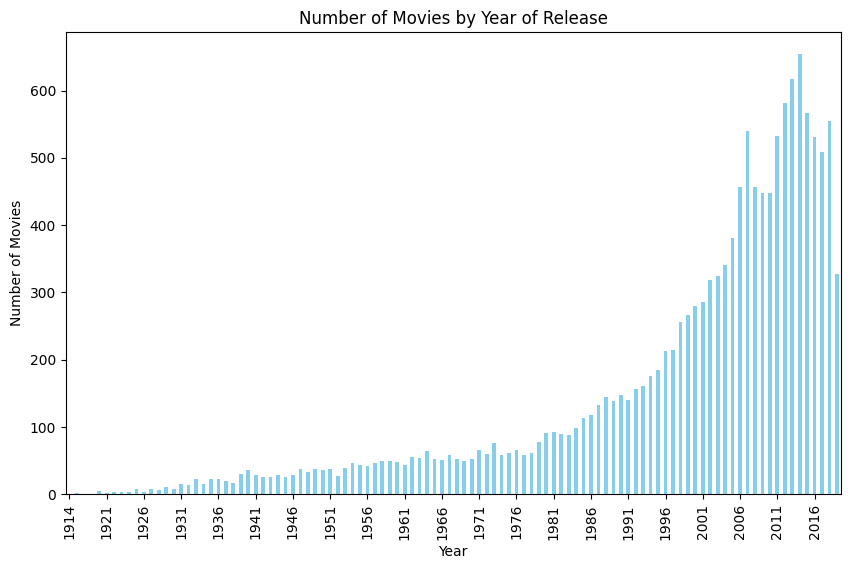

In [16]:
# Convert the 'in_theaters_date' column to datetime format and extract the release year
# This helps in aggregating data by release year
audience_data['release_year'] = pd.to_datetime(audience_data['in_theaters_date'], format='%d-%m-%Y').dt.year

# Creating a histogram to visualize the number of movies released each year
plt.figure(figsize=(10, 6))

# Counting movies for each release year and sorting by year
release_year_counts = audience_data['release_year'].value_counts().sort_index()
release_year_counts.plot(kind='bar', color='skyblue')

# Adding plot title and axis labels
plt.title("Number of Movies by Year of Release")
plt.xlabel("Year")
plt.ylabel("Number of Movies")

# Customizing x-axis labels to show every 5th year for better readability
years = release_year_counts.index  # Get unique years from the data
plt.xticks(
    ticks=range(0, len(years), 5),  # Adjust tick spacing to every 5th year
    labels=[str(year) for year in years[::5]]  # Display labels for every 5th year
)

# Display the plot
plt.show()


**Distribution of Audience Ratings Across Years**

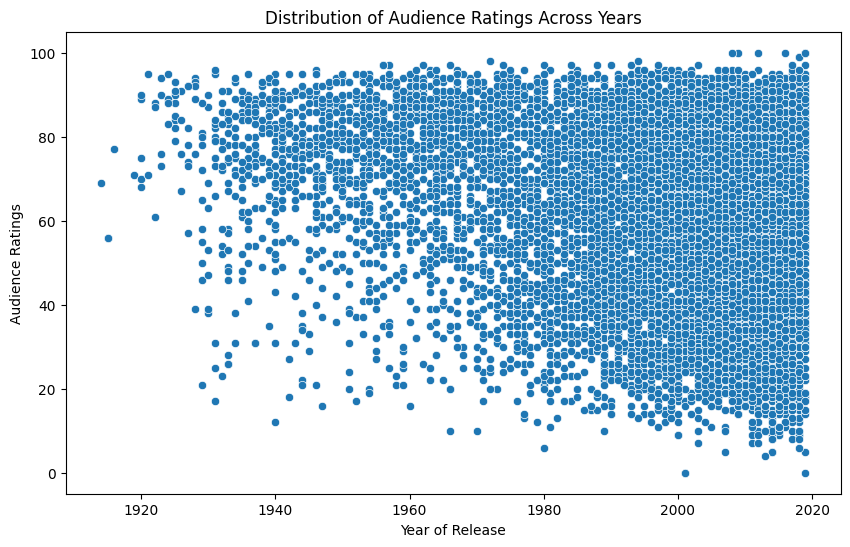

In [17]:
# Create a scatter plot to visualize the distribution of audience ratings across release years
plt.figure(figsize=(10, 6))

# sns.scatterplot creates a scatter plot with 'release_year' on the x-axis and 'audience_rating' on the y-axis
sns.scatterplot(x='release_year', y='audience_rating', data=audience_data)

# Adding a title and axis labels for clarity
plt.title("Distribution of Audience Ratings Across Years")
plt.xlabel("Year of Release")
plt.ylabel("Audience Ratings")

# Display the plot
plt.show()


**Distribution of TomatoMeter Ratings Across Years**

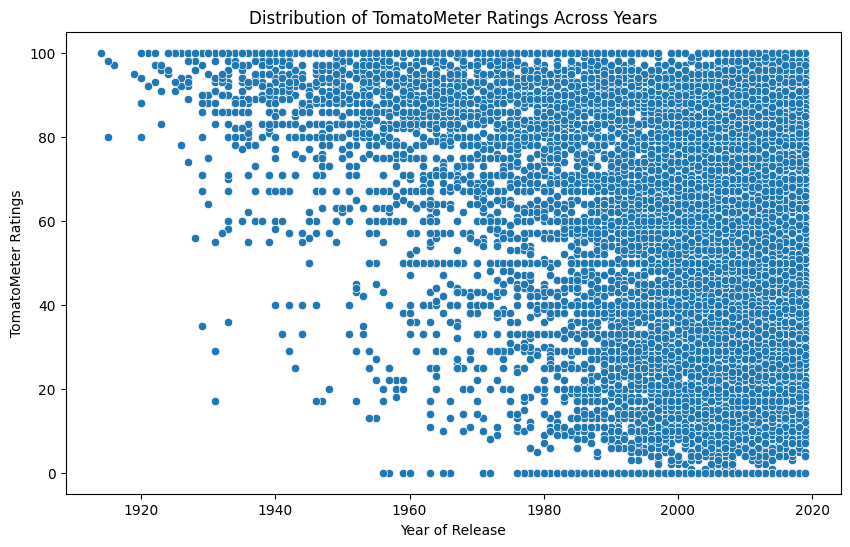

In [18]:
# Create a scatter plot to visualize the distribution of TomatoMeter ratings across release years
plt.figure(figsize=(10, 6))

# sns.scatterplot creates a scatter plot with 'release_year' on the x-axis and 'tomatometer_rating' on the y-axis
sns.scatterplot(x='release_year', y='tomatometer_rating', data=audience_data)

# Adding a title and axis labels for clarity
plt.title("Distribution of TomatoMeter Ratings Across Years")
plt.xlabel("Year of Release")
plt.ylabel("TomatoMeter Ratings")

# Display the plot
plt.show()


**Finding the Average Audience Rating for Each Writer**

In [19]:
# Grouping the data by 'writers' and calculating the average 'audience_rating' for each writer
# Sorting the results in descending order to get the highest average ratings first
audience_data.groupby('writers')['audience_rating'].mean().sort_values(ascending=False)


,audience_rating
writers,
Abe Forsythe,100.0
Bertrand Normand,100.0
Anne Aghion,100.0
Michele Mitchell,100.0
"Scott Beck, Bryan Woods",100.0
...,...
"Naman Barsoom, Daniel Wallner",5.0
Roy Sallows,5.0
Ted Kupper,0.0


**Visualizing Top 10 Lengthy Movies**

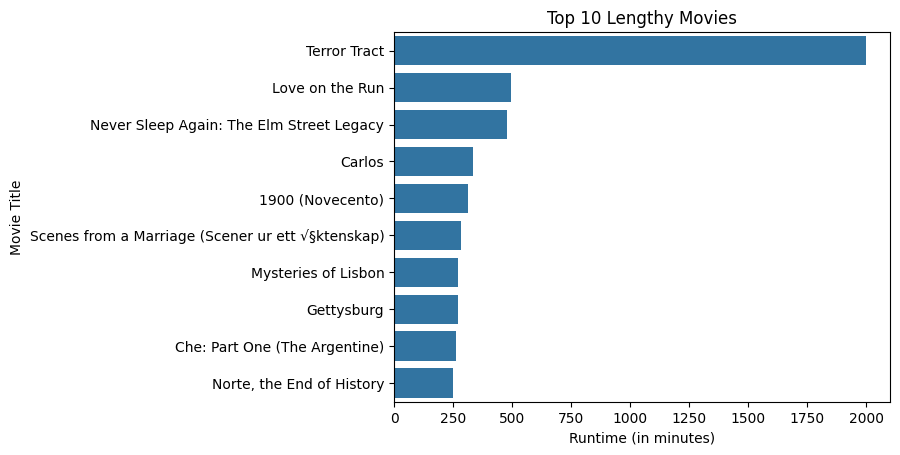

In [20]:
# Find the top 10 longest movies by selecting the 10 movies with the largest runtime
# The 'nlargest' function is used to select the top 10 rows based on 'runtime_in_minutes'
le = audience_data.nlargest(10, 'runtime_in_minutes')[['movie_title', 'runtime_in_minutes']].set_index('movie_title')

# Create a bar plot to visualize the top 10 longest movies
# Fix: Use keyword arguments `x` and `y` explicitly in sns.barplot for better readability
sns.barplot(x=le['runtime_in_minutes'], y=le.index)

# Adding title and labels to the plot for clarity
plt.title('Top 10 Lengthy Movies')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Movie Title')

# Display the plot
plt.show()


**Displaying Top 10 Highest Audience-Rated Movie Titles, Writers, and Directors**

In [21]:
# Find the top 10 highest audience-rated movies by selecting the 10 movies with the highest 'audience_rating'
# The 'nlargest' function is used to select the top 10 rows based on 'audience_rating'
top_10 = audience_data.nlargest(10, 'audience_rating')[['movie_title', 'audience_rating', 'writers', 'directors']].set_index('movie_title')

# Display the top 10 movies with their audience ratings, writers, and directors
top_10


,audience_rating,writers,directors
movie_title,,,
Prima Ballerina,100.0,Bertrand Normand,Laurent Gentot
Ice People,100.0,Anne Aghion,Anne Aghion
Haunt,100.0,"Scott Beck, Bryan Woods","Scott Beck, Bryan Woods"
Little Monsters,100.0,Abe Forsythe,Abe Forsythe
The Miners' Hymns,100.0,"David Metcalfe, Bill Morrison (II)",Bill Morrison (II)
The Uncondemned,100.0,Michele Mitchell,"Nick Louvel, Michele Mitchell"
Wonders of the Sea,100.0,"David Chocron, Fran√ßois Mantello, Jean-Jacque...","Jean-Jacques Mantello, Jean-Michel Cousteau"
Back Roads,99.0,"Tawni O'Dell, Adrian Lyne",Alex Pettyfer
Maktub,99.0,"Guy Amir, Hanan Savyon",Oded Raz


**Average Audience Rating of Movies Year-wise**

In [22]:
# Calculate the average audience rating for movies year-wise
# Grouping by 'release_year' and calculating the mean of 'audience_rating' for each year
data1 = (
    audience_data.groupby('release_year')[['release_year', 'audience_rating']]  # Group by 'release_year'
    .mean()  # Calculate the mean audience rating for each year
    .sort_values(by='audience_rating', ascending=False)  # Sort by average rating in descending order
    .set_index('release_year')  # Set 'release_year' as the index for better visualization
)

# Display the result
data1


,audience_rating
release_year,
1924.0,88.750000
1925.0,86.500000
1923.0,83.250000
1921.0,83.000000
1928.0,80.500000
...,...
2013.0,55.881686
2016.0,54.487759
2009.0,54.046875


**Visualizing Rating Counts of Movies**

<ipython-input-23-e74125159c82>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(audience_data, x='rating', palette=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
<ipython-input-23-e74125159c82>:6: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(audience_data, x='rating', palette=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])


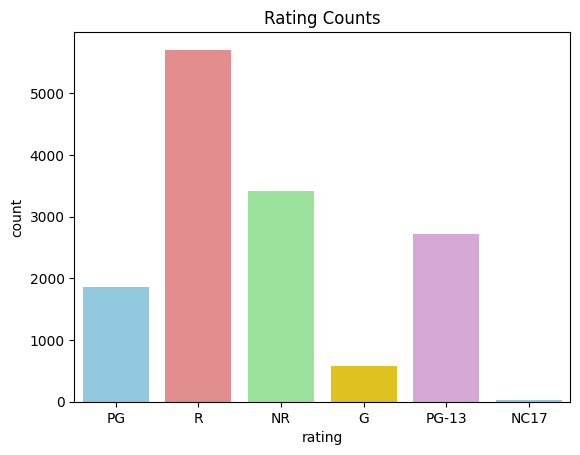

In [23]:
# Calculate the count of each unique rating in the 'rating' column
audience_data['rating'].value_counts()

# Create a count plot to visualize the distribution of movie ratings
# The palette is customized with different colors for each rating category
sns.countplot(audience_data, x='rating', palette=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])

# Add a title to the plot for clarity
plt.title('Rating Counts')

# Display the plot
plt.show()


**Visualizing Audience Ratings for Different Movie Ratings (PG, R, NR, G, PG-13, NC-17)**

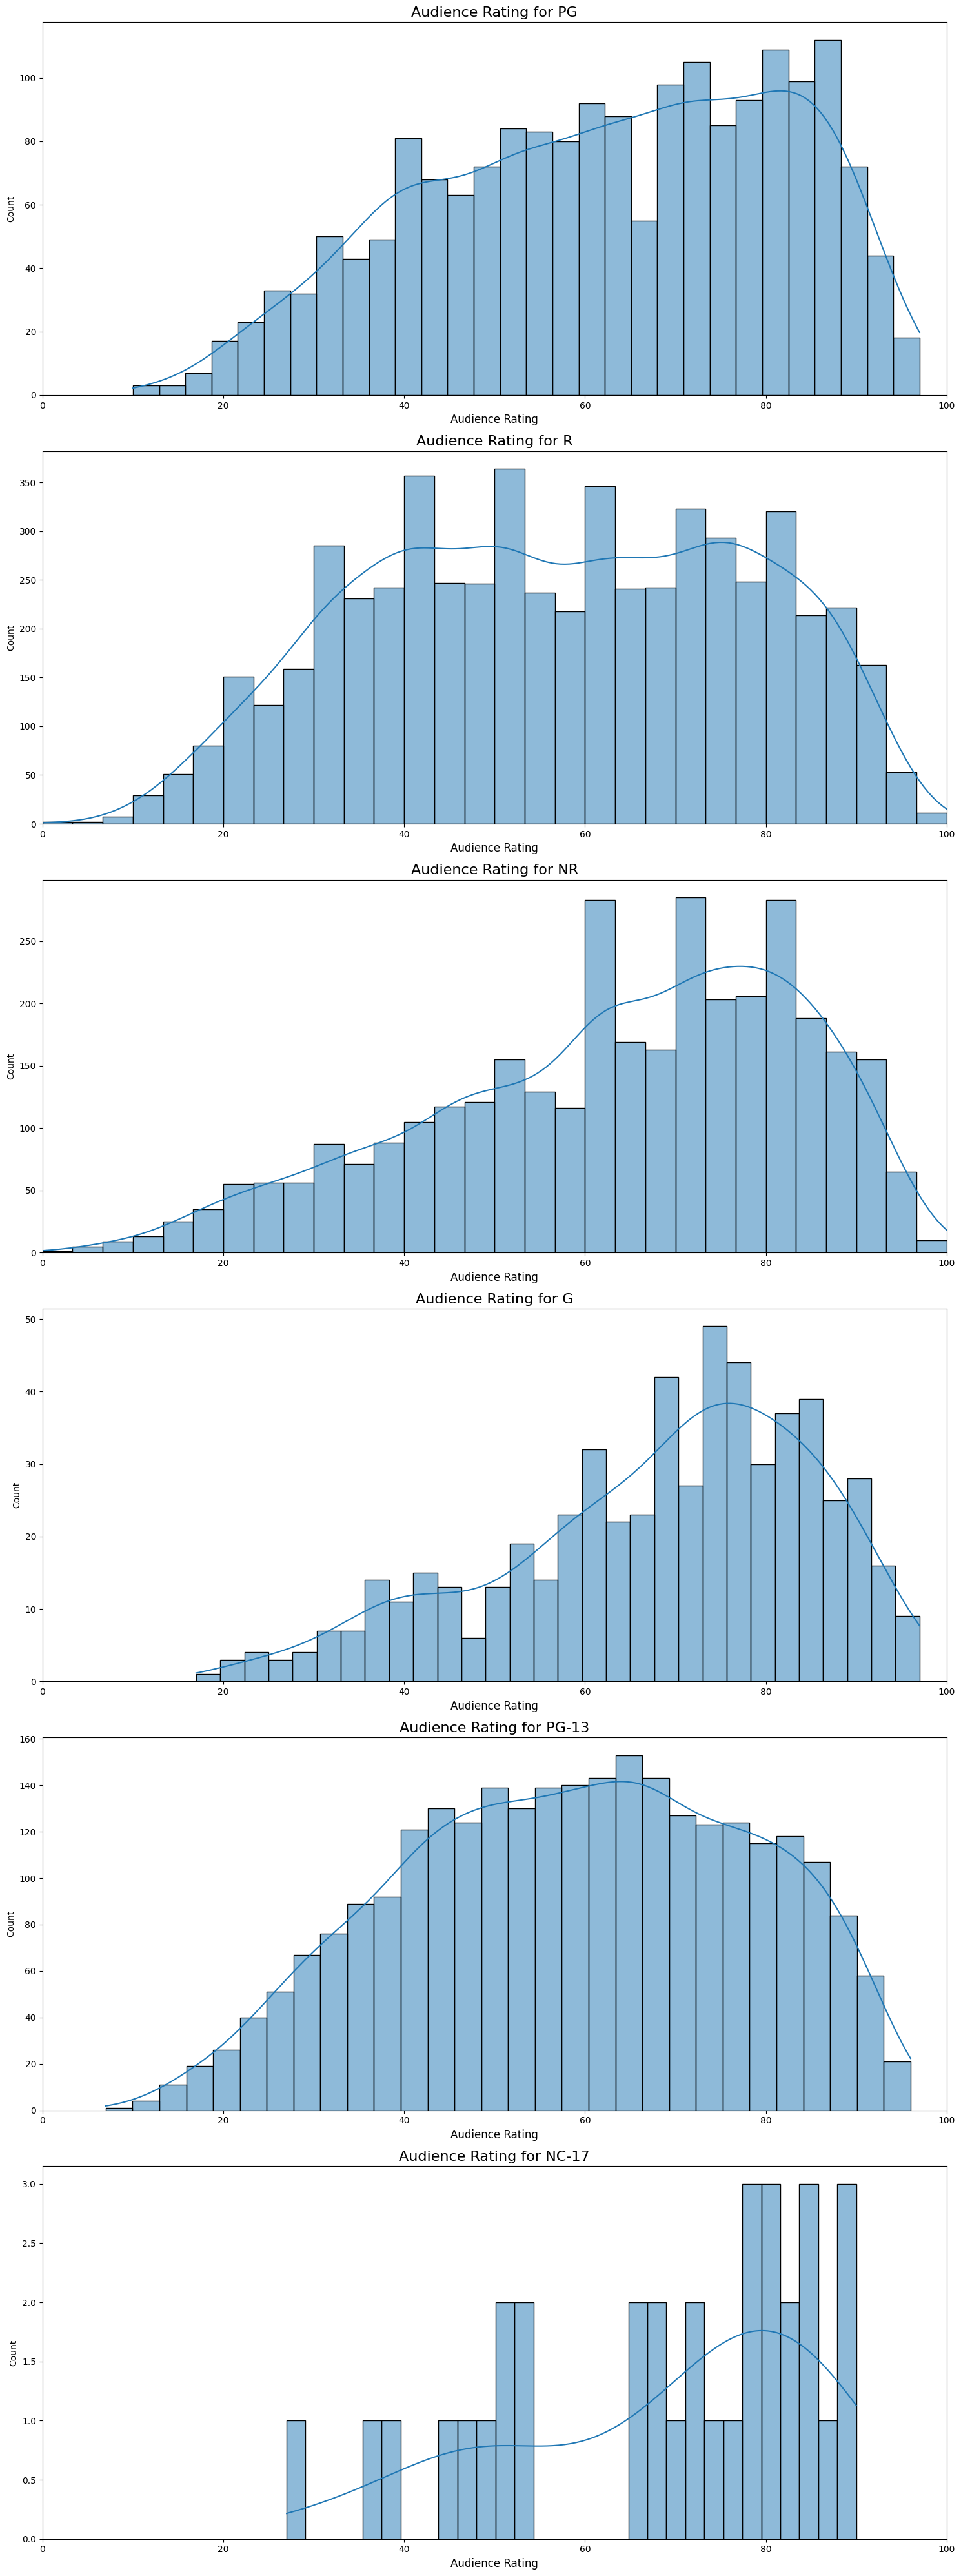

In [24]:
# Create a 6-row subplot to visualize the distribution of audience ratings for different movie ratings
f, ax = plt.subplots(6, 1, figsize=(15, 40))

# Plot for PG rating
sns.histplot(audience_data[(audience_data['rating'] == 'PG') &
                             (audience_data['audience_rating'] <= 100)].audience_rating,
             ax=ax[0], bins=30, kde=True)
ax[0].set_title('Audience Rating for PG', fontsize=16)
ax[0].set_xlabel("Audience Rating", fontsize=12)
ax[0].set_xlim([0, 100])

# Plot for R rating
sns.histplot(audience_data[(audience_data['rating'] == 'R') &
                             (audience_data['audience_rating'] <= 100)].audience_rating,
             ax=ax[1], bins=30, kde=True)
ax[1].set_title('Audience Rating for R', fontsize=16)
ax[1].set_xlabel("Audience Rating", fontsize=12)
ax[1].set_xlim([0, 100])

# Plot for NR (Not Rated) rating
sns.histplot(audience_data[(audience_data['rating'] == 'NR') &
                             (audience_data['audience_rating'] <= 100)].audience_rating,
             ax=ax[2], bins=30, kde=True)
ax[2].set_title('Audience Rating for NR', fontsize=16)
ax[2].set_xlabel("Audience Rating", fontsize=12)
ax[2].set_xlim([0, 100])

# Plot for G rating
sns.histplot(audience_data[(audience_data['rating'] == 'G') &
                             (audience_data['audience_rating'] <= 100)].audience_rating,
             ax=ax[3], bins=30, kde=True)
ax[3].set_title('Audience Rating for G', fontsize=16)
ax[3].set_xlabel("Audience Rating", fontsize=12)
ax[3].set_xlim([0, 100])

# Plot for PG-13 rating
sns.histplot(audience_data[(audience_data['rating'] == 'PG-13') &
                             (audience_data['audience_rating'] <= 100)].audience_rating,
             ax=ax[4], bins=30, kde=True)
ax[4].set_title('Audience Rating for PG-13', fontsize=16)
ax[4].set_xlabel("Audience Rating", fontsize=12)
ax[4].set_xlim([0, 100])

# Plot for NC-17 rating
sns.histplot(audience_data[(audience_data['rating'] == 'NC17') &
                             (audience_data['audience_rating'] <= 100)].audience_rating,
             ax=ax[5], bins=30, kde=True)
ax[5].set_title('Audience Rating for NC-17', fontsize=16)
ax[5].set_xlabel("Audience Rating", fontsize=12)
ax[5].set_xlim([0, 100])

# Adjust layout to ensure proper spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Visualizing TomatoMeter Status Counts**

<ipython-input-25-960b3596be46>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(audience_data, x='tomatometer_status', palette=['skyblue', 'lightcoral', 'lightgreen'])


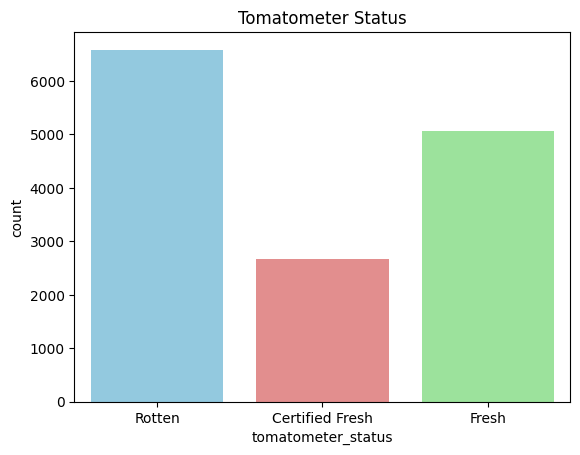

In [25]:
# Calculate the count of each unique value in the 'tomatometer_status' column
audience_data['tomatometer_status'].value_counts()

# Create a count plot to visualize the distribution of tomato meter status
# The palette is customized with different colors for each tomato meter status category
sns.countplot(audience_data, x='tomatometer_status', palette=['skyblue', 'lightcoral', 'lightgreen'])

# Add a title to the plot for clarity
plt.title('Tomatometer Status')

# Display the plot
plt.show()


**Visualizing Audience Ratings for Different TomatoMeter Statuses (Certified Fresh, Fresh, Rotten)**

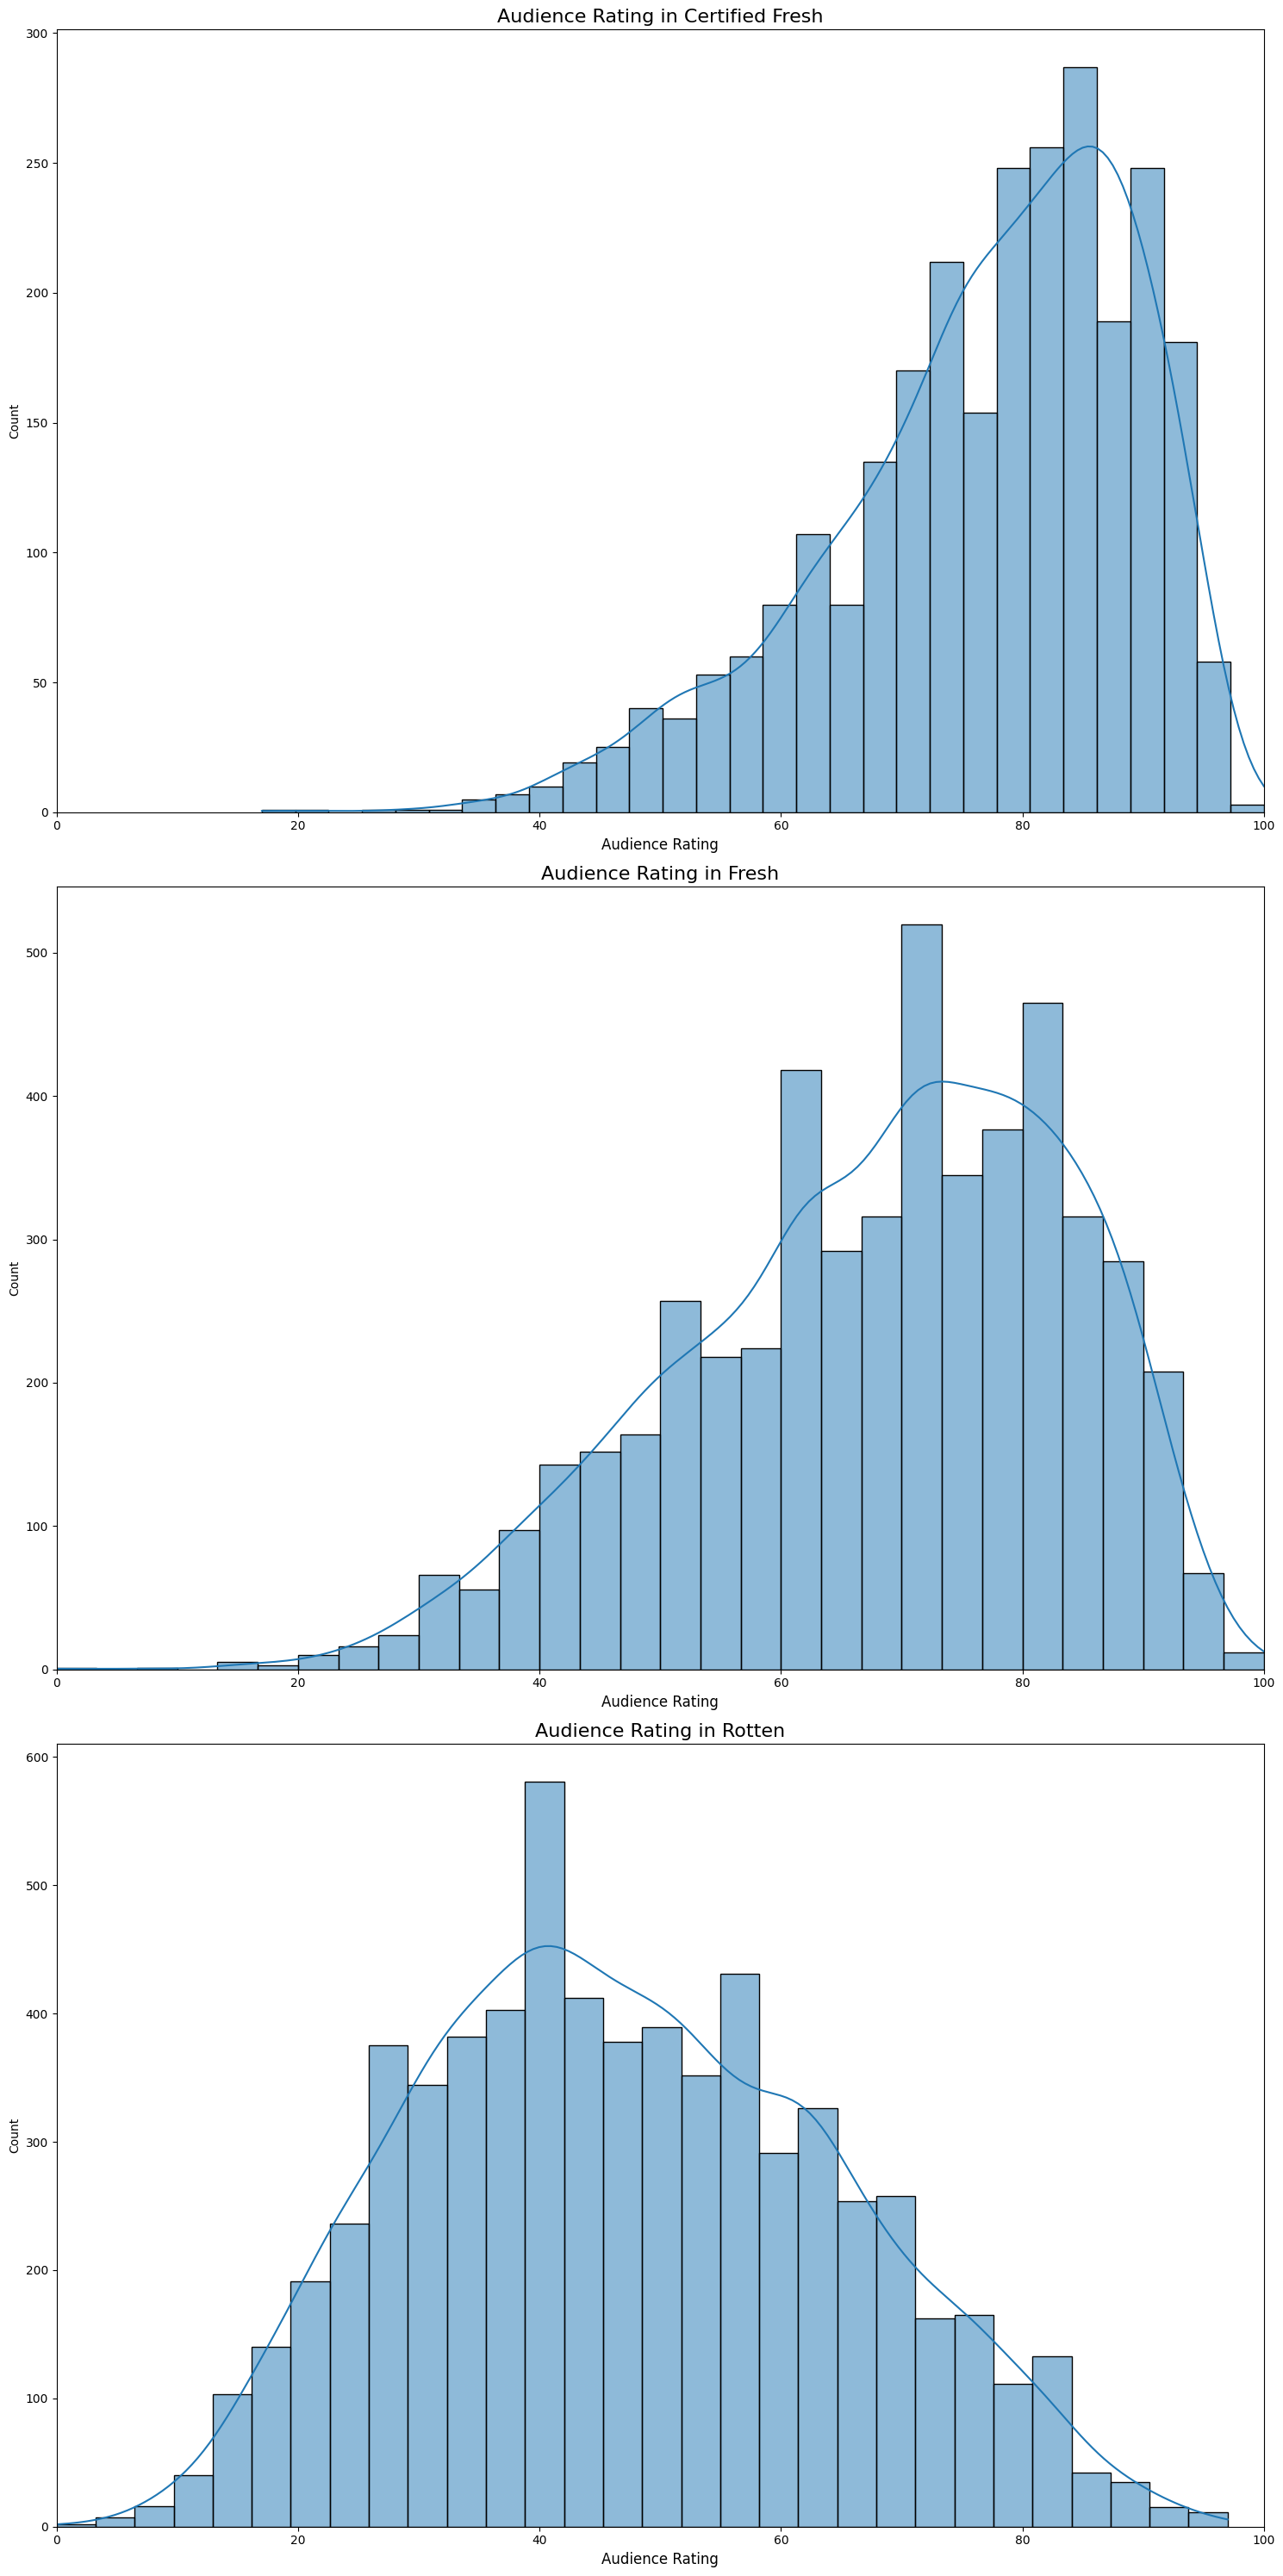

In [26]:
# Create a 3-row subplot to visualize the distribution of audience ratings for different tomato meter statuses
f, ax = plt.subplots(3, 1, figsize=(15, 30))

# Plot for Certified Fresh status
sns.histplot(audience_data[(audience_data['tomatometer_status'] == 'Certified Fresh') &
                             (audience_data['audience_rating'] <= 100)].audience_rating,
             ax=ax[0], bins=30, kde=True)
ax[0].set_title('Audience Rating in Certified Fresh', fontsize=16)
ax[0].set_xlabel("Audience Rating", fontsize=12)
ax[0].set_xlim([0, 100])

# Plot for Fresh status
sns.histplot(audience_data[(audience_data['tomatometer_status'] == 'Fresh') &
                             (audience_data['audience_rating'] <= 100)].audience_rating,
             ax=ax[1], bins=30, kde=True)
ax[1].set_title('Audience Rating in Fresh', fontsize=16)
ax[1].set_xlabel("Audience Rating", fontsize=12)
ax[1].set_xlim([0, 100])

# Plot for Rotten status
sns.histplot(audience_data[(audience_data['tomatometer_status'] == 'Rotten') &
                             (audience_data['audience_rating'] <= 100)].audience_rating,
             ax=ax[2], bins=30, kde=True)
ax[2].set_title('Audience Rating in Rotten', fontsize=16)
ax[2].set_xlabel("Audience Rating", fontsize=12)
ax[2].set_xlim([0, 100])

# Adjust layout to ensure proper spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


**Top 10 Studios by Number of Movies Produced**

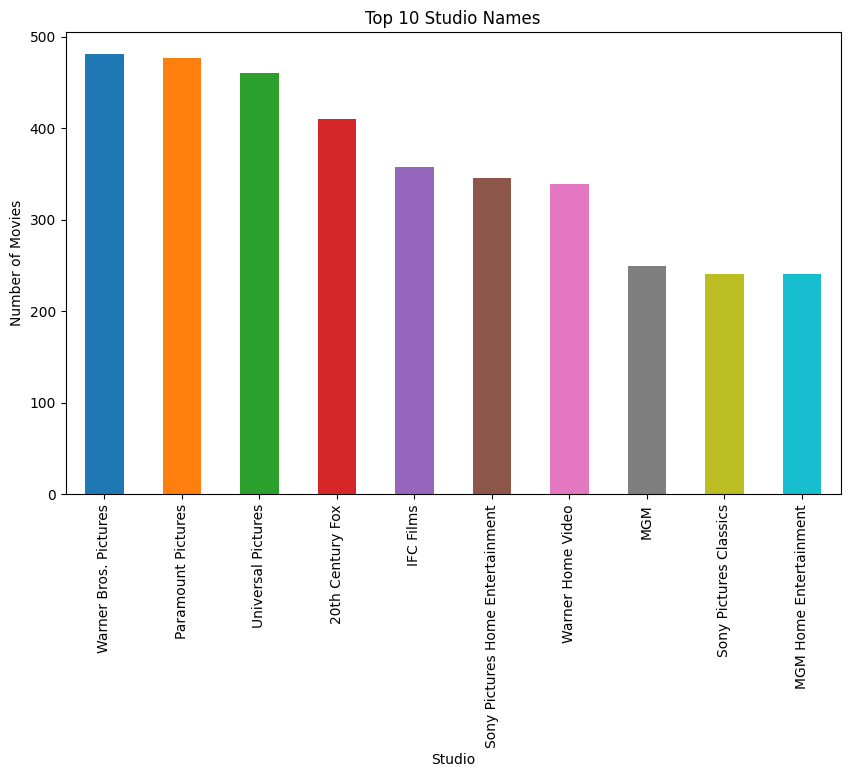

In [27]:
# Count the number of movies produced by each studio and select the top 10
studio_10 = audience_data['studio_name'].value_counts().head(10)

# Generate a color palette with a unique color for each bar using 'tab10' colormap
colors = plt.cm.tab10(range(len(studio_10)))  # 'tab10' colormap ensures distinct colors for each bar

# Create a bar plot for the top 10 studios and their movie counts
plt.figure(figsize=(10, 6))
studio_10.plot(kind='bar', color=colors)

# Add a title and labels to the plot for clarity
plt.title("Top 10 Studio Names")
plt.xlabel("Studio")
plt.ylabel("Number of Movies")

# Display the plot
plt.show()


**Top 10 Directors by Number of Movies Directed**

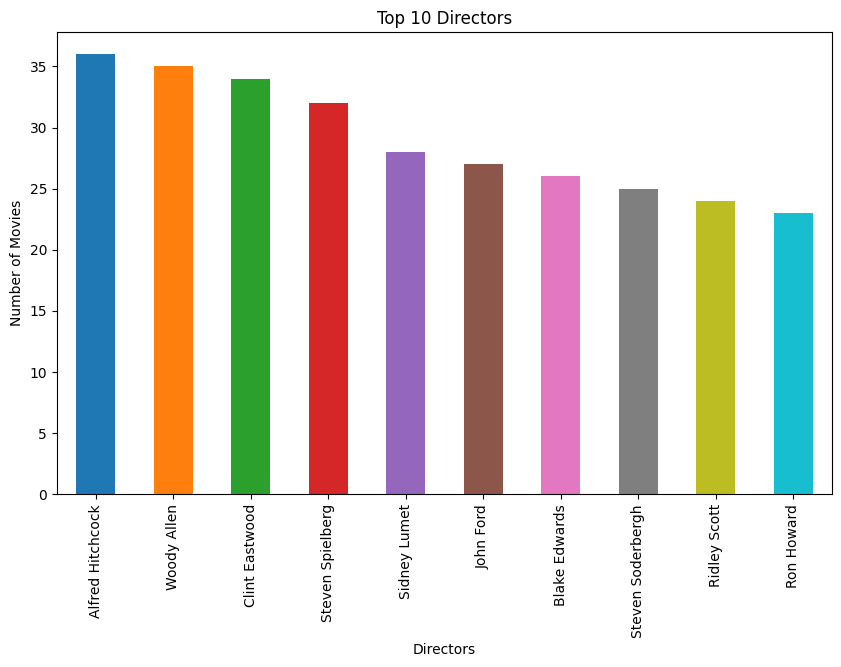

In [28]:
# Count the number of movies directed by each director and select the top 10
top_10_directors = audience_data['directors'].value_counts().head(10)

# Generate a color palette with a unique color for each bar using 'tab10' colormap
colors = plt.cm.tab10(range(len(top_10_directors)))  # 'tab10' colormap ensures distinct colors for each bar

# Create a bar plot for the top 10 directors and their movie counts
plt.figure(figsize=(10, 6))
top_10_directors.plot(kind='bar', color=colors)

# Add a title and labels to the plot for clarity
plt.title("Top 10 Directors")
plt.xlabel("Directors")
plt.ylabel("Number of Movies")

# Display the plot
plt.show()


**Top 10 Genres by Number of Movies**

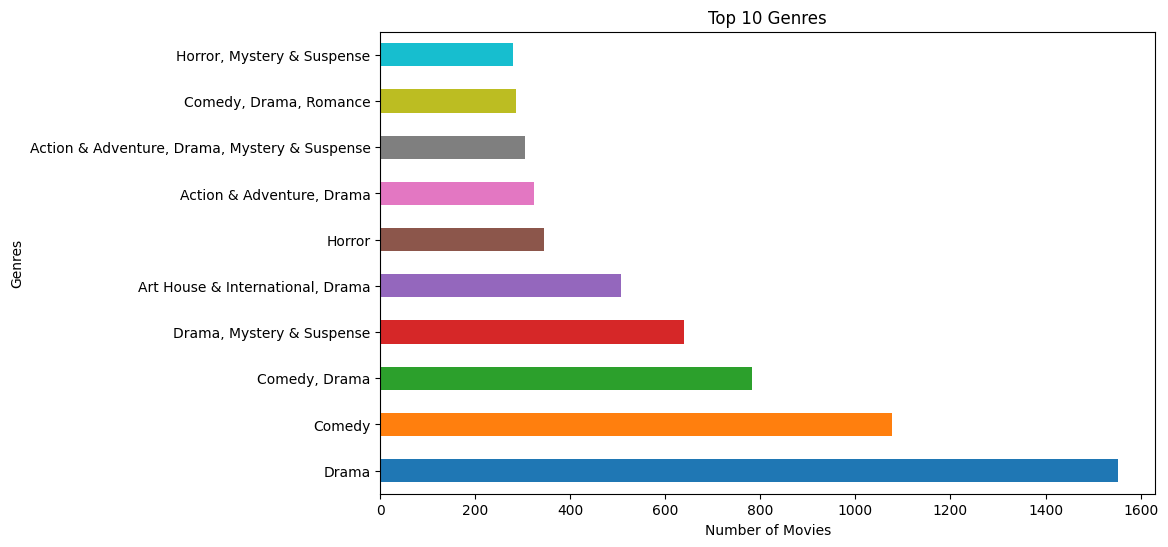

In [29]:
# Count the number of movies in each genre and select the top 10 genres
top_10_genres = audience_data['genre'].value_counts().head(10).sort_values(ascending=False)

# Generate a color palette with a unique color for each bar using 'tab10' colormap
colors = plt.cm.tab10(range(len(top_10_genres)))  # 'tab10' colormap ensures distinct colors for each bar

# Create a horizontal bar plot for the top 10 genres and their movie counts
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='barh', color=colors)

# Add a title and labels to the plot for clarity
plt.title("Top 10 Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genres")

# Display the plot
plt.show()


**Extracting and Analyzing Unique Genres in the Dataset**

Number of unique genres: 21
Unique genres: {'Art House & International', 'Mystery & Suspense', 'Western', 'Musical & Performing Arts', 'Animation', 'Romance', 'Cult Movies', 'Science Fiction & Fantasy', 'Horror', 'Anime & Manga', 'Comedy', 'Documentary', 'Television', 'Drama', 'Gay & Lesbian', 'Sports & Fitness', 'Kids & Family', 'Special Interest', 'Classics', 'Faith & Spirituality', 'Action & Adventure'}
Unique genre counts: genre
Art House & International    1661
Mystery & Suspense            234
Western                         7
Musical & Performing Arts      17
Animation                     291
Romance                        11
Cult Movies                    17
Science Fiction & Fantasy      29
Horror                        735
Anime & Manga                   0
Comedy                       3235
Documentary                   712
Television                      0
Drama                        3207
Gay & Lesbian                   0
Sports & Fitness                0
Kids & Family      

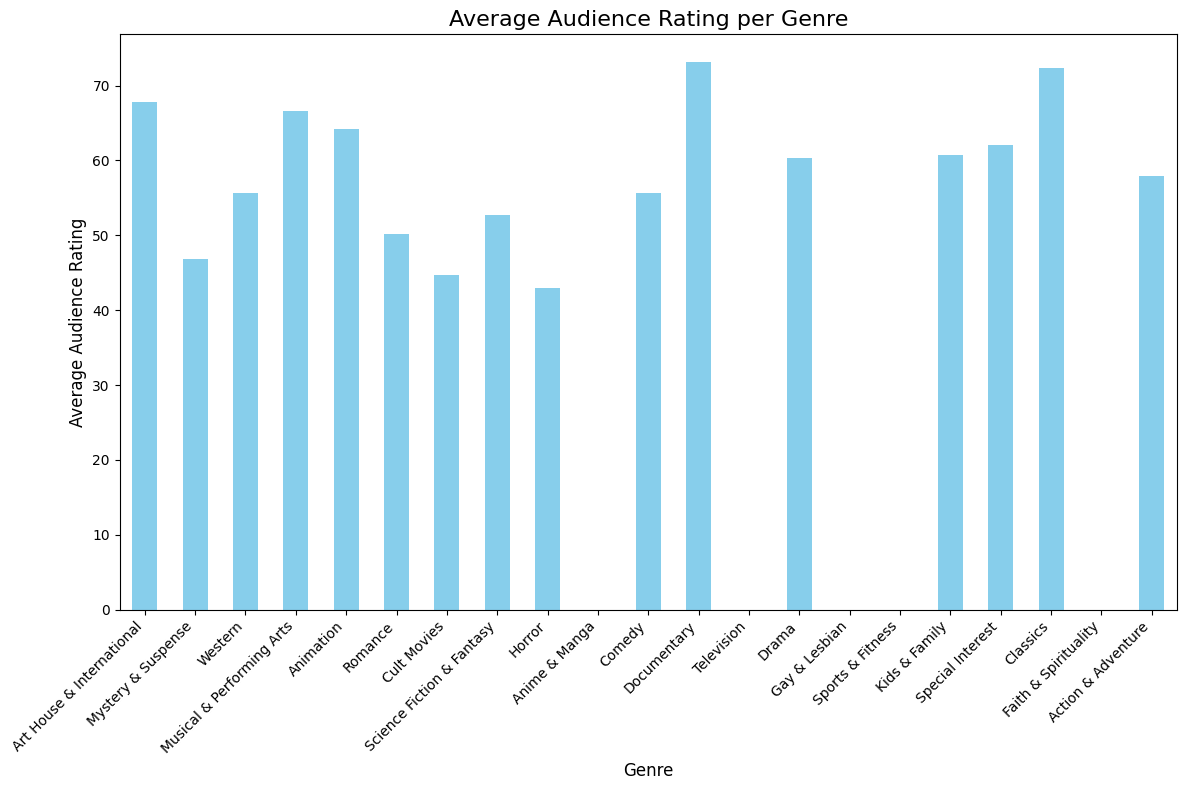

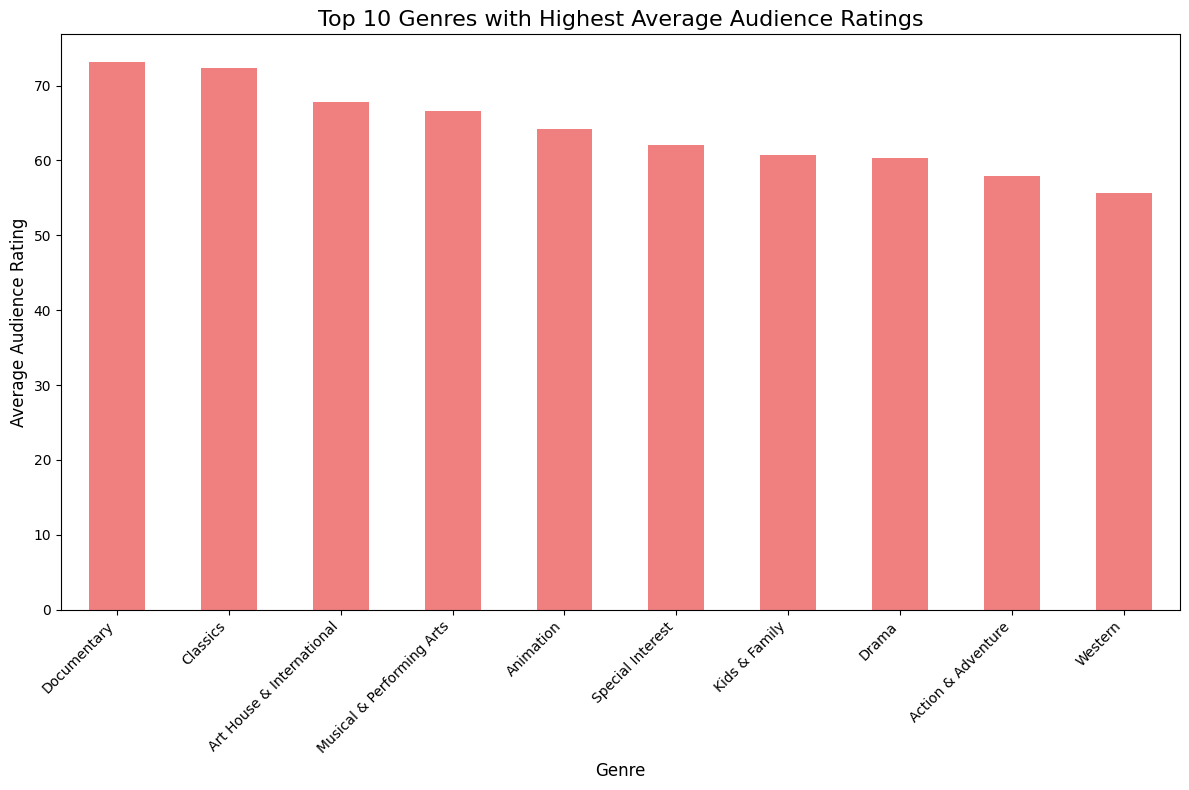

In [30]:
# Extract all unique genres from the 'genre' column, handle missing values, and split genres by comma
unique_genres = set(genre.strip() for genres in audience_data['genre'].dropna() for genre in genres.split(','))

# Print the number of unique genres and the list of genres
print(f"Number of unique genres: {len(unique_genres)}")
print(f"Unique genres: {unique_genres}")

# Split the genres for each movie and flatten the list to count occurrences
genres = audience_data['genre'].str.split(',').explode()

# Count the occurrences of each genre
genre_counts = genres.value_counts()

# Ensure all unique genres are included, even if a genre has a count of 0
genre_counts = genre_counts.reindex(unique_genres, fill_value=0)

# Display the genre counts
print("Unique genre counts:", genre_counts)

# Combine the exploded genres with the original ratings to calculate the average rating for each genre
ratings_by_genre = pd.DataFrame({
    'genre': genres,
    'audience_rating': audience_data.loc[genres.index, 'audience_rating'].values
})

# Calculate the average rating for each genre
avg_ratings_by_genre = ratings_by_genre.groupby('genre')['audience_rating'].mean()

# Ensure all unique genres are included, even if a genre has a count of 0
avg_ratings_by_genre = avg_ratings_by_genre.reindex(unique_genres, fill_value=0)

# Plot the average ratings for each genre
plt.figure(figsize=(12, 8))
avg_ratings_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average Audience Rating per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Audience Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Get the top 10 genres with the highest average audience ratings
top_10_genres = avg_ratings_by_genre.sort_values(ascending=False).head(10)

# Plot the top 10 genres with the highest average ratings
plt.figure(figsize=(12, 8))
top_10_genres.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Genres with Highest Average Audience Ratings', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Audience Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Genres and Tomatometer Status Distribution: Nested Pie Chart**

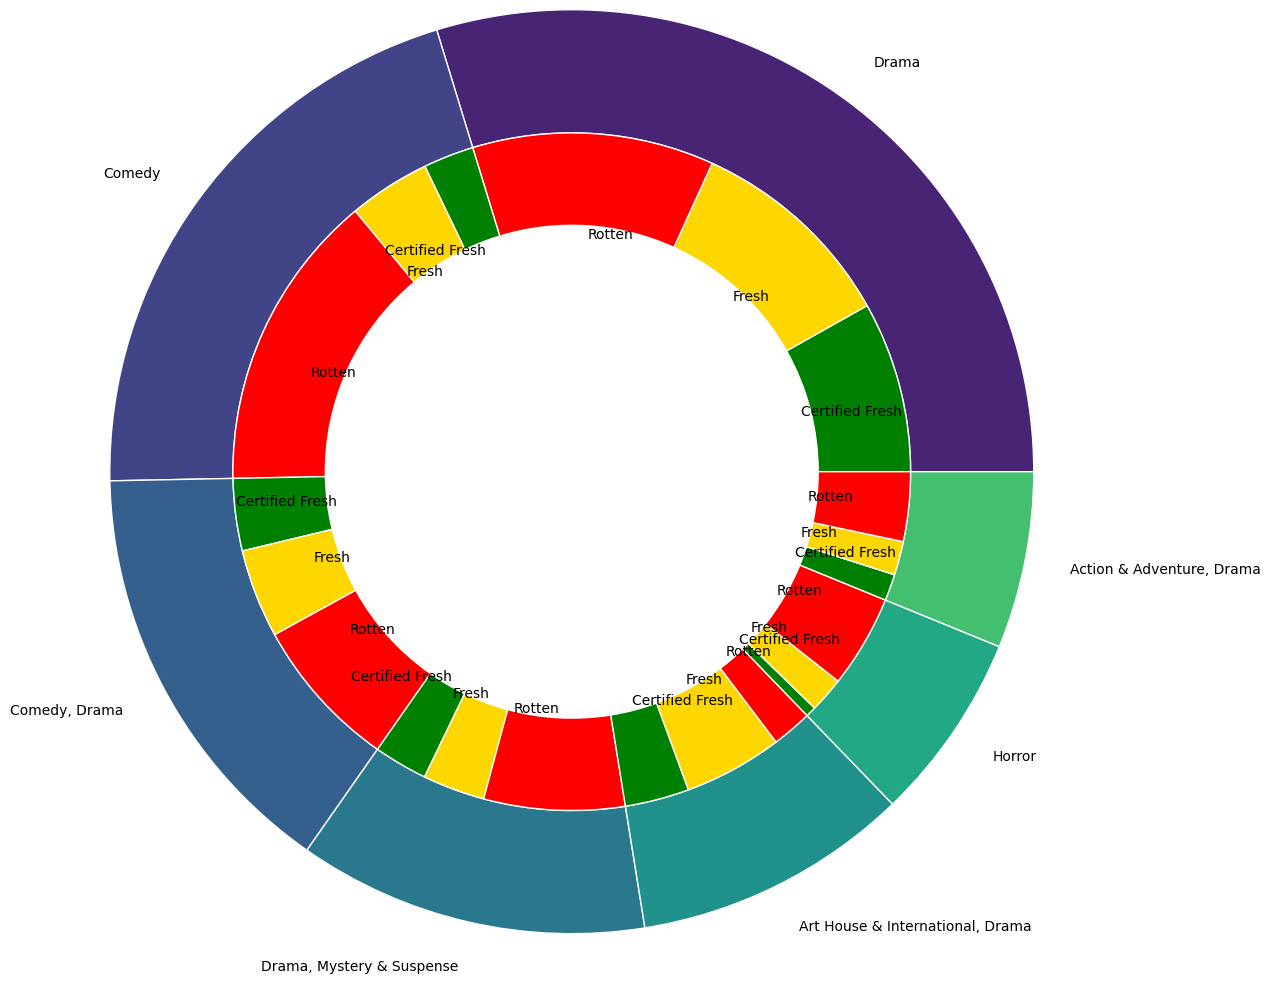

In [31]:
# Genres and Tomatometer Status Distribution

# Step 1: Define data for genres and tomatometer status
# Get the top 7 genres by counting their occurrences in the 'genre' column
genres = audience_data['genre'].value_counts().head(7)  # Top 7 genres
group_names = genres.index  # Genre names (indices)
group_size = genres.values  # Genre counts (values)

# Step 2: Tomatometer status distribution for each genre
# Group the data by genre and tomatometer status, then count the occurrences for each combination
genre_status = audience_data.groupby(['genre', 'tomatometer_status']).size().unstack(fill_value=0)

# Step 3: Prepare subgroup names and sizes for the pie chart
# The subgroup names are 'Certified Fresh', 'Fresh', and 'Rotten' repeated for each genre
subgroup_names = ['Certified Fresh', 'Fresh', 'Rotten'] * len(group_names)
subgroup_size = []  # List to store the size of each subgroup

# Loop through each genre to get the count of each tomatometer status within that genre
for genre in group_names:
    subgroup_size.append(genre_status.loc[genre, 'Certified Fresh'])  # Count of 'Certified Fresh' for each genre
    subgroup_size.append(genre_status.loc[genre, 'Fresh'])  # Count of 'Fresh' for each genre
    subgroup_size.append(genre_status.loc[genre, 'Rotten'])  # Count of 'Rotten' for each genre

# Step 4: Define the colors for the pie chart
# Outer pie chart uses a viridis colormap
outer_colors = plt.cm.viridis([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

# Inner pie chart uses a fixed set of colors for the three subgroups
inner_colors = ['green', 'gold', 'red'] * len(group_names)

# Step 5: Create the nested pie chart
fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure with a specified size
ax.axis('equal')  # Ensure the pie chart is a circle

# Outer pie chart represents the genres
outer_pie, _ = ax.pie(group_size, radius=1.5, labels=group_names, colors=outer_colors)
plt.setp(outer_pie, width=0.4, edgecolor='white')  # Set the width and edgecolor for the outer pie chart

# Inner pie chart represents the tomatometer status for each genre
inner_pie, _ = ax.pie(subgroup_size, radius=1.1, labels=subgroup_names, labeldistance=0.7, colors=inner_colors)
plt.setp(inner_pie, width=0.3, edgecolor='white')  # Set the width and edgecolor for the inner pie chart

# Step 6: Display the chart
plt.margins(0, 0)  # Remove margins around the plot
plt.show()  # Show the final plot


**Genres and Ratings Distribution: Nested Pie Chart**

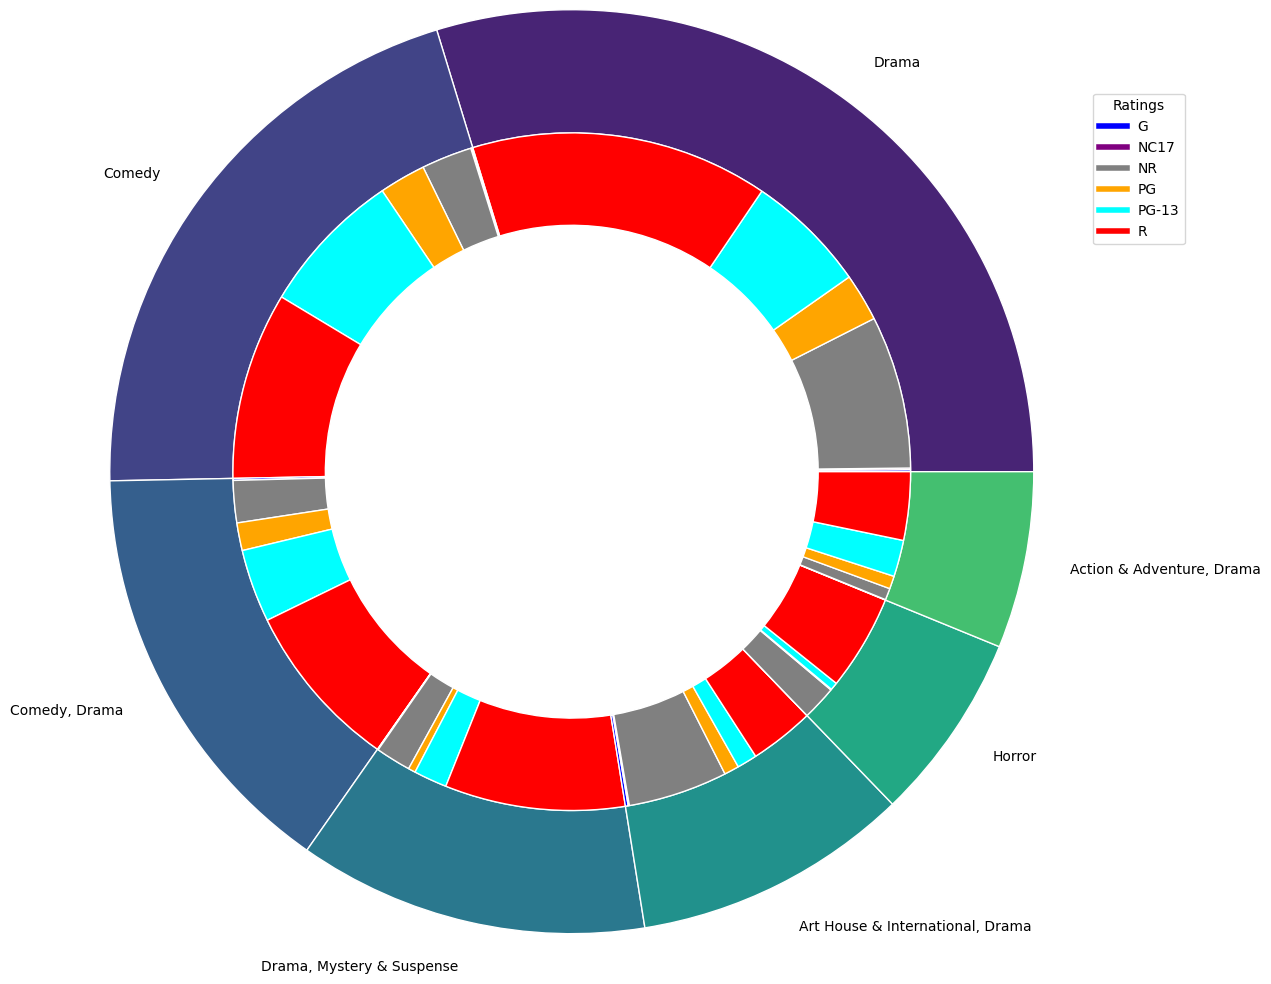

In [32]:
# Define the top genres (Top 7 genres based on their count)
top_genres = audience_data['genre'].value_counts().head(7)  # Top 7 genres
group_names = top_genres.index  # Genre names
group_size = top_genres.values  # Genre counts

# Ratings distribution for each genre
# Group by genre and rating to count occurrences of each rating per genre
genre_rating = audience_data.groupby(['genre', 'rating']).size().unstack(fill_value=0)

# Prepare subgroup names and sizes for the inner pie chart (Ratings)
# Create a list of rating categories (G, NC17, NR, PG, PG-13, R)
subgroup_names = ['G', 'NC17', 'NR', 'PG', 'PG-13', 'R'] * len(group_names)
subgroup_size = []  # List to store the sizes for the ratings subgroups

# Populate the subgroup_size list by extracting the rating counts for each genre
for genre in group_names:
    subgroup_size.extend(genre_rating.loc[genre, ['G', 'NC17', 'NR', 'PG', 'PG-13', 'R']])

# Colors for the outer (Genres) and inner (Ratings) pie charts
outer_colors = plt.cm.viridis([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])  # Colors for genres
inner_colors = ['blue', 'purple', 'gray', 'orange', 'cyan', 'red'] * len(group_names)  # Colors for ratings

# Create the nested pie chart
fig, ax = plt.subplots(figsize=(10, 10))  # Create a figure and axis for the pie chart
ax.axis('equal')  # Ensure the pie chart is a circle

# Outer pie chart (Genres) - Displays the distribution of the top genres
outer_pie, _ = ax.pie(group_size, radius=1.5, labels=group_names, colors=outer_colors)
plt.setp(outer_pie, width=0.4, edgecolor='white')  # Set width and edge color for the outer pie chart

# Inner pie chart (Ratings) - Displays the distribution of ratings within each genre
inner_pie, _ = ax.pie(subgroup_size, radius=1.1, labels=None, colors=inner_colors)
plt.setp(inner_pie, width=0.3, edgecolor='white')  # Set width and edge color for the inner pie chart

# Add legend for the inner pie chart (Ratings)
ratings_labels = ['G', 'NC17', 'NR', 'PG', 'PG-13', 'R']  # Rating labels
ratings_patches = [plt.Line2D([0], [0], color=color, lw=4) for color in inner_colors[:6]]  # Create legend patches for ratings
plt.legend(ratings_patches, ratings_labels, title="Ratings", loc="upper right", bbox_to_anchor=(1.3, 1))  # Add legend

# Display the chart
plt.margins(0, 0)  # Remove margins for better display
plt.show()  # Show the plot


# Model Building

**Loading the Dataset**

In [33]:
audience_df = pd.read_csv('/content/Rotten_Tomatoes_Movies3.csv')

**Sentiment Analysis on Critics' Consensus**

In [34]:
# Importing TextBlob library for performing sentiment analysis
from textblob import TextBlob

# Creating a flag for rows where 'critics_consensus' is not null
audience_df['critics_flag'] = audience_df['critics_consensus'].notna().astype(int)

# Define the sentiment analysis function using TextBlob
def perform_sentiment_analysis(text):
    # Using TextBlob to get the polarity of the text
    sentiment = TextBlob(text).sentiment.polarity  # Example: TextBlob polarity score
    return sentiment

# Apply sentiment analysis to 'critics_consensus' only for rows where 'critics_flag' is 1
audience_df['sentiment_score'] = audience_df.apply(
    lambda row: perform_sentiment_analysis(row['critics_consensus']) if row['critics_flag'] == 1 else None,
    axis=1
)


**Checking Null Values**

In [35]:
# checking for null values
audience_df.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


**Handling Missing Values and Date Feature Engineering**

In [36]:
# Fill NaN values in date columns with empty strings
audience_df['in_theaters_date'] = audience_df['in_theaters_date'].fillna('')  # Replace NaN in 'in_theaters_date' with empty string
audience_df['on_streaming_date'] = audience_df['on_streaming_date'].fillna('')  # Replace NaN in 'on_streaming_date' with empty string

# Fill other object columns with "<column_name>_null" to indicate missing values
for col in audience_df.select_dtypes('object').columns:
    audience_df[col] = audience_df[col].fillna(f"{col}_null")  # Replace NaN in object columns with a placeholder string indicating null

# Convert the date columns to datetime format to enable date-related calculations
audience_df['in_theaters_date'] = pd.to_datetime(audience_df['in_theaters_date'], errors='coerce')  # Convert 'in_theaters_date' to datetime
audience_df['on_streaming_date'] = pd.to_datetime(audience_df['on_streaming_date'], errors='coerce')  # Convert 'on_streaming_date' to datetime

# Extract year and month from the 'in_theaters_date' and 'on_streaming_date' columns
audience_df['in_theaters_year'] = audience_df['in_theaters_date'].dt.year  # Extract year from 'in_theaters_date'
audience_df['in_theaters_month'] = audience_df['in_theaters_date'].dt.month  # Extract month from 'in_theaters_date'
audience_df['on_streaming_year'] = audience_df['on_streaming_date'].dt.year  # Extract year from 'on_streaming_date'
audience_df['on_streaming_month'] = audience_df['on_streaming_date'].dt.month  # Extract month from 'on_streaming_date'

# Handle rows where dates could not be parsed (if any) by filling missing days_to_streaming with -1
# audience_df['days_to_streaming'] = audience_df['days_to_streaming'].fillna(-1).astype(int)  # Optionally, calculate the number of days between the dates

# Display the resulting DataFrame to confirm changes
print(audience_df.head())  # Display the first few rows of the modified DataFrame

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                             critics_consensus_null      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

<ipython-input-36-f1f43c6f4145>:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  audience_df['on_streaming_date'] = pd.to_datetime(audience_df['on_streaming_date'], errors='coerce')  # Convert 'on_streaming_date' to datetime


**Dropping Unnecessary Columns from the DataFrame**

In [37]:
# List of columns to drop from the DataFrame
drop_cols = ['movie_info', 'critics_consensus', 'critics_flag']  # Columns that are no longer needed for analysis

# Drop the specified columns from the DataFrame
audience_df.drop(columns=drop_cols, axis=1, inplace=True)  # Removes the columns from the DataFrame in-place


**Removing Missing Values and Resetting Index**

In [38]:
# Drop rows with missing values in the 'audience_rating' column
audience_df.dropna(subset=['audience_rating'], inplace=True)  # Removes rows where 'audience_rating' is NaN

# Reset the index of the DataFrame after dropping rows
audience_df.reset_index(drop=True, inplace=True)  # Resets the index and drops the old index


**Analyzing the Number of Directors per Movie**

In [39]:
# Calculate the number of directors for each movie
audience_df['num_directors'] = audience_df['directors'].apply(lambda x : len(x.split(',')))  # Split by ',' and count

# Find the movie(s) with the highest number of directors
audience_df[audience_df['num_directors'] == audience_df['num_directors'].max()]  # Filter movie(s) with max directors


,movie_title,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,sentiment_score,in_theaters_year,in_theaters_month,on_streaming_year,on_streaming_month,num_directors
2170,ABCs of Death 2,NR,Horror,"Ahron Keshales, Navot Papushado, Bill Plympton...",writers_null,"Beatrice Dalle, Victoria Broom, Andy Nyman, Ma...",NaT,2015-02-03,125.0,Magnet Releasing,Fresh,73,33,39.0,-1.850372e-17,NaN,NaN,2015.0,2.0,31
13462,The ABCs of Death,R,"Horror, Mystery & Suspense","Christopher Smith (VIII), Angela Bettis, Simon...",writers_null,"Ingrid Bolso Berdal, Neil Maskell, Kyra Zagors...",2013-08-03,2013-05-21,129.0,Magnolia Pictures,Rotten,37,68,23.0,-5.000000e-02,2013.0,8.0,2013.0,5.0,31


**Analyzing the Number of Writers per Movie**

In [40]:
#Number of writers in each movie
audience_df['num_writers'] = audience_df['writers'].apply(lambda x : len(x.split(',')))
# Maximum No. of writers
audience_df[audience_df['num_writers'] == audience_df['num_writers'].max()]

,movie_title,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,...,tomatometer_rating,tomatometer_count,audience_rating,sentiment_score,in_theaters_year,in_theaters_month,on_streaming_year,on_streaming_month,num_directors,num_writers
16366,Ziegfeld Follies,NR,"Classics, Musical & Performing Arts","Vincente Minnelli, Lemuel Ayers, Charles Walte...","Robert Lewis, Lemuel Ayers, Charles Walters, H...","Fred Astaire, Judy Garland, Gene Kelly, Willia...",NaT,2006-04-25,109.0,MGM Home Entertainment,...,67,9,59.0,NaN,NaN,NaN,2006.0,4.0,7,34


**Analyzing the Number of casts per Movie**

In [41]:
# Number of casts in each movie
audience_df['num_casts'] = audience_df['cast'].apply(lambda x : len(x.split(',')))
# Maximum No.of Casts
audience_df[audience_df['num_casts'] == audience_df['num_casts'].max()]

,movie_title,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,...,tomatometer_count,audience_rating,sentiment_score,in_theaters_year,in_theaters_month,on_streaming_year,on_streaming_month,num_directors,num_writers,num_casts
906,Malcolm X,PG-13,Drama,Spike Lee,"Spike Lee, Arnold Perl","Denzel Washington, Angela Bassett, Al Freeman ...",NaT,2000-01-18,201.0,Warner Bros.,...,57,91.0,0.466667,NaN,NaN,2000.0,1.0,1,2,306


**Replacing Tomatometer Status with Numeric Values**

In [42]:
# Replacing the string labels in 'tomatometer_status' with numeric values
audience_df['tomatometer_status'].replace(['Rotten','Fresh','Certified Fresh'], [0, 1, 2], inplace=True)

<ipython-input-42-9912a4507f03>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  audience_df['tomatometer_status'].replace(['Rotten','Fresh','Certified Fresh'], [0, 1, 2], inplace=True)
<ipython-input-42-9912a4507f03>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  audience_df['tomatometer_status']

**Converting 'in_theaters_date' to Datetime and Extracting Release Year**

In [43]:
# Convert the 'in_theaters_date' column to datetime format, considering day-first format
audience_df['in_theaters_date'] = pd.to_datetime(audience_df['in_theaters_date'], dayfirst=True)

# Extract the release year from the 'in_theaters_date' column
audience_df['release_year'] = audience_df['in_theaters_date'].dt.year

**Correlation Matrix of Numerical Features**

<Axes: >

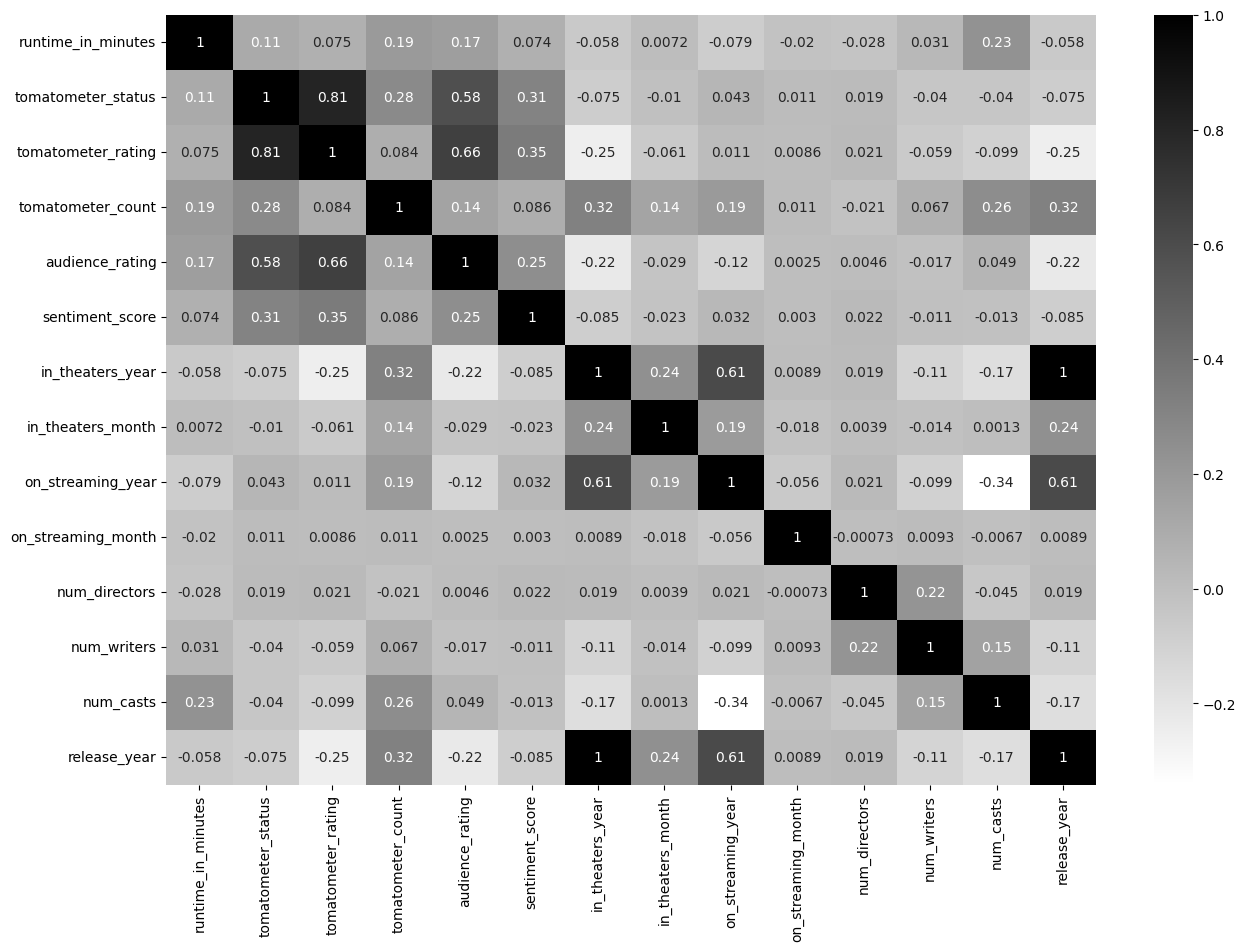

In [44]:
# Calculate the correlation matrix for numeric columns in the dataset
corr = audience_df.select_dtypes('number').corr()  # Selects only numerical columns and calculates their correlation

# Create a heatmap for visualizing the correlation matrix
plt.figure(figsize=(15, 10))  # Set the figure size for the heatmap
sns.heatmap(corr, annot=True, cmap='binary')  # Draw the heatmap with annotations and 'binary' color map


**Correlation of Numerical Features with Audience Rating**

In [45]:
# Calculate the correlation between all numerical columns and the target variable 'audience_rating'
audience_df.select_dtypes('number').corr()['audience_rating'].sort_values(ascending=False)

,audience_rating
audience_rating,1.000000
tomatometer_rating,0.660111
tomatometer_status,0.582228
sentiment_score,0.253643
runtime_in_minutes,0.168507
tomatometer_count,0.141012
num_casts,0.049081
num_directors,0.004587
on_streaming_month,0.002474
num_writers,-0.016563


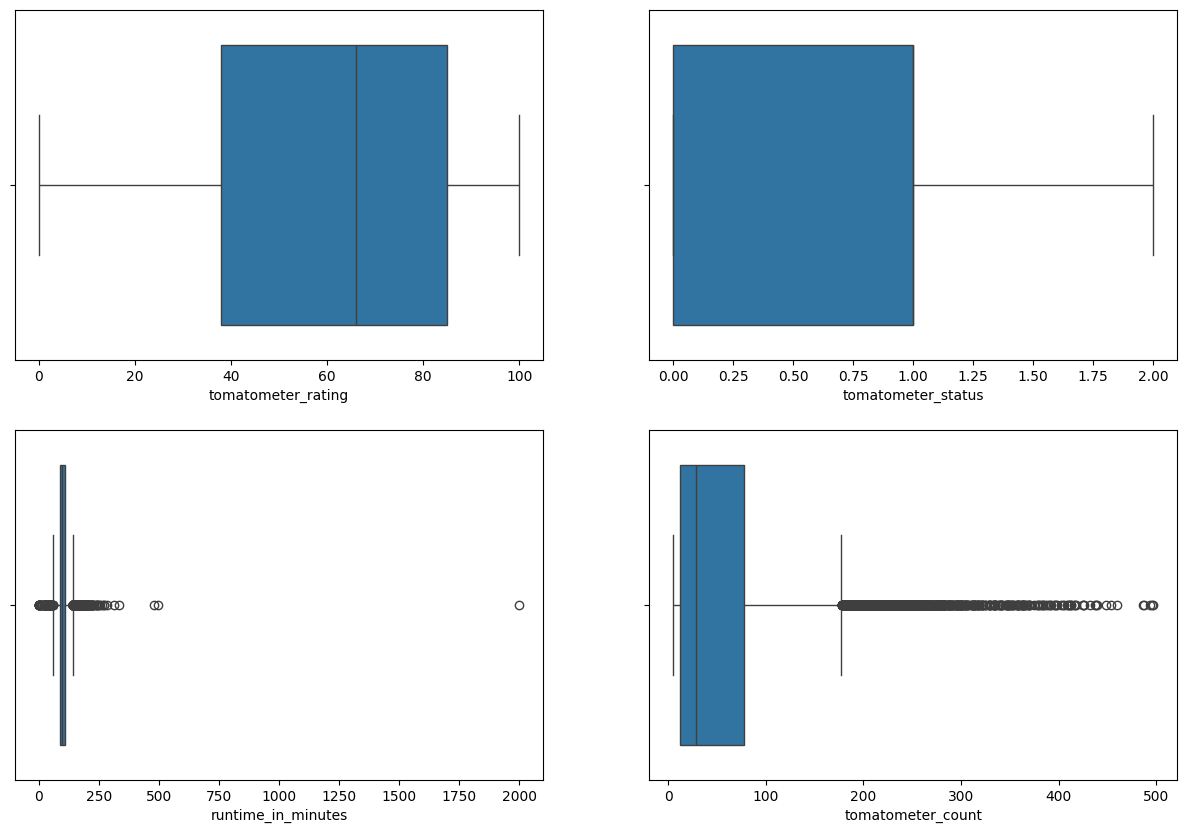

In [46]:
# Columns with high correlation
# checking for outliers

box_col = ['tomatometer_rating','tomatometer_status','runtime_in_minutes','tomatometer_count']
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
ax = ax.flatten()
for index, value in enumerate(box_col):
    sns.boxplot(data=audience_df, x=value, ax=ax[index])

**Outlier Removal Based on IQR (Interquartile Range)**

In [47]:
# Creating masks to filter out outliers based on the IQR for each relevant column
mask1 = audience_df['tomatometer_rating'] < iqr(audience_df['tomatometer_rating']) * 1.5 + np.percentile(audience_df['tomatometer_rating'], 75)
mask2 = audience_df['tomatometer_status'] < iqr(audience_df['tomatometer_status']) * 1.5 + np.percentile(audience_df['tomatometer_status'], 75)
mask3 = audience_df['runtime_in_minutes'] < iqr(audience_df['runtime_in_minutes']) * 1.5 + np.percentile(audience_df['runtime_in_minutes'], 75)
mask4 = audience_df['tomatometer_count'] < iqr(audience_df['tomatometer_count']) * 1.5 + np.percentile(audience_df['tomatometer_count'], 75)

# Combining all masks to filter out rows where any of the columns have outliers
filtered_df = audience_df  # In this case, no rows are removed

# Print the shape of the original and filtered DataFrame
print("Original DataFrame shape:", audience_df.shape)
print("Filtered DataFrame shape:", filtered_df.shape)


Original DataFrame shape: (16386, 23)
Filtered DataFrame shape: (16386, 23)


**Word2Vec for Cast Feature Preprocessing and Document Vector Creation**

In [48]:
import numpy as np
from gensim.models import Word2Vec
# Step 1: Preprocess the 'Cast' feature to tokenize the cast names
# Here, the 'cast' feature is split by commas to get individual names as tokens
audience_df['Cast_Tokens'] = audience_df['cast'].apply(lambda x: x.split(','))

# Step 2: Train Word2Vec model on the tokens from the 'Cast_Tokens' column
# Flatten the list of tokenized cast names to create training data for Word2Vec
tokenized_cast = audience_df['Cast_Tokens'].tolist()
model = Word2Vec(sentences=tokenized_cast, vector_size=120, window=5, min_count=1, workers=4)

# Step 3: Create document vectors for each movie
# The function calculates the average of the word vectors for the tokens (cast names) in each document
def get_document_vector(tokens, model):
    # Fetch the vector for each token if it exists in the model's vocabulary
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    # Return the average vector or a zero vector if no valid token vectors exist
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Fallback to zero vector for missing tokens

# Apply the function to create a vector for each document (movie's cast)
audience_df['Cast_Vector'] = audience_df['Cast_Tokens'].apply(lambda tokens: get_document_vector(tokens, model))

# Step 4: Transform the list of vectors into a DataFrame where each column represents a component of the vector
# Each element of 'Cast_Vector' (which is a list) will be split into individual columns
vector_df = pd.DataFrame(audience_df['Cast_Vector'].tolist(), columns=[f'vec_{i}' for i in range(model.vector_size)])

# Concatenate the vector DataFrame with the original DataFrame (dropping the original cast-related columns)
audience_df = pd.concat([audience_df.drop(columns=['Cast_Vector']), vector_df], axis=1)

# Drop unnecessary columns (cast and Cast_Tokens) after vectorization
audience_df.drop(columns=['cast', 'Cast_Tokens'], inplace=True, axis=1)

# Final Dataset with the cast feature represented as vectors
audience_df


,movie_title,rating,genre,directors,writers,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,...,vec_110,vec_111,vec_112,vec_113,vec_114,vec_115,vec_116,vec_117,vec_118,vec_119
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,2010-12-02,2010-06-29,83.0,20th Century Fox,0,...,-0.000133,-0.000145,0.000042,-0.000335,-0.000680,0.000284,0.000657,0.000445,0.000044,-0.000730
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,NaT,2010-10-19,90.0,Sony Pictures Classics,2,...,-0.003843,-0.000203,-0.000479,-0.000300,0.000793,-0.000751,0.000577,0.000005,0.000828,0.000060
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,1979-05-10,1997-08-27,118.0,Waner Bros.,1,...,-0.000069,-0.000647,0.000413,0.000538,0.000375,-0.000168,-0.000337,0.001045,-0.000106,-0.000148
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,NaT,2001-03-06,95.0,Criterion Collection,2,...,-0.003425,-0.001701,0.000025,0.000915,-0.001257,-0.001656,0.001683,0.002397,-0.000994,0.000683
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,1954-01-01,2003-05-20,127.0,Disney,1,...,0.001909,-0.001689,0.001462,0.001185,-0.001074,-0.001145,0.000466,0.000585,-0.001448,0.000451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16381,Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,1981-02-10,2003-05-27,104.0,MCA Universal Home Video,0,...,0.000366,-0.000553,-0.000014,-0.000135,-0.000936,0.000594,-0.000815,-0.000706,-0.000208,-0.001102
16382,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston",2016-04-03,2016-06-07,108.0,Walt Disney Animation Studios,2,...,-0.000116,0.000076,-0.000926,-0.000279,0.000190,0.000007,-0.000134,0.000160,-0.000937,-0.000311
16383,Zorba the Greek,NR,"Action & Adventure, Art House & International,...",directors_null,writers_null,NaT,2004-08-03,142.0,Fox,1,...,-0.000270,-0.000541,0.000780,-0.000372,0.000396,-0.000858,-0.001497,0.001706,0.002090,-0.002230
16384,Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble",NaT,2001-02-02,139.0,Paramount Pictures,1,...,0.000009,-0.001228,0.000188,0.000320,0.000113,-0.000676,0.000567,0.000182,0.000501,0.000485


In [49]:
filtered_df=audience_df.copy()

**Feature and Target Separation with Categorical and Numerical Column Identification**

In [50]:
# Step 1: Separate the target variable ('audience_rating') from the features
# Copy the 'audience_rating' column as the target (y)
target = filtered_df['audience_rating'].copy()

# Drop the 'audience_rating' column from the features DataFrame (X)
filtered_df.drop('audience_rating', axis=1, inplace=True)

# Assign the target to 'y' and features to 'X'
y = target
X = filtered_df

# Step 2: Identify categorical and numerical columns in the features DataFrame (X)
# Select columns of type 'object' (categorical data)
categorical_cols = X.select_dtypes(include=['object']).columns

# Select columns of type 'int64' or 'float64' (numerical data)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Step 3: Split the categorical columns that need special processing (e.g., directors, genre, cast)
# These columns will be excluded from the general categorical processing (handled separately)
categorical_split = ['directors', 'genre']

# Step 4: Final list of categorical columns excluding those that need special handling
categorical_final = [i for i in categorical_cols if i not in categorical_split]

# Now, 'categorical_final' contains the categorical columns that don't require special handling
# 'categorical_split' holds columns like 'directors' and 'genre' that may need separate preprocessing


In [51]:
print(y.shape)
audience_df.shape

(16386,)


(16386, 142)

In [52]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")

Length of X: 16386
Length of y: 16386


**Feature Engineering and Preprocessing with Stratified Split for Categorical and Numerical Columns**

In [53]:
# Function to perform feature engineering on categorical columns
def feature_engineer_split(df, column_name, unique_vals):
    # Fill NaN values with 'null' to handle missing values
    df[column_name] = df[column_name].fillna('null')

    # Split string values into lists
    _list = df[column_name].str.split(",")

    # Create a dictionary for new columns based on unique values
    _cols = {f'{val}': [] for val in unique_vals}

    # Populate the dictionary with 1 (if value exists) or 0 (if value doesn't exist)
    for row in _list:
        row_set = set(row) if row else set()
        for val in unique_vals:
            _cols[f'{val}'].append(1 if val in row_set else 0)

    # Convert the dictionary into a DataFrame with the same index as the original DataFrame
    _df = pd.DataFrame(_cols, index=df.index)

    # Concatenate the new columns to the original DataFrame
    df = pd.concat([df, _df], axis=1)

    return df

# Loop through each column in 'categorical_split' to apply the feature engineering
for column in categorical_split:
    print(f'Processing column: {column}')

    # Print the length of the DataFrame before processing
    print(f"Length of X before processing column {column}: {len(X)}")

    # Fill missing values with 'null'
    X[column] = X[column].fillna('null')

    # Split values and collect unique values
    _list = X[column].str.split(",")
    unique_vals = set()
    for row in _list:
        if row:  # Skip empty rows
            unique_vals.update(row)
    unique_vals = sorted(unique_vals)  # Sort unique values for consistency

    # Apply feature engineering using the helper function
    X = feature_engineer_split(X, column, unique_vals)

    # Drop the original column after processing
    X.drop(columns=[column], inplace=True)

    # Print the length of the DataFrame after processing
    print(f"Length of X after processing column {column}: {len(X)}")
    print(f'Finished processing column: {column}')

# Update the list of categorical columns after feature engineering
categorical_cols = [col for col in X.select_dtypes(include=['object']).columns if col not in categorical_split]

# Preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),  # Impute missing values using KNN
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values using the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Column transformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),  # Apply numerical transformer to numerical columns
        ('cat', categorical_transformer, categorical_cols)  # Apply categorical transformer to categorical columns
    ])

# Stratified split: ensuring equal distribution of target values in training and testing sets
if len(y.unique()) > 1:  # Check if the target has more than one unique value
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
else:
    # If there's only one unique value in the target, perform a normal split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split completed successfully.")


Processing column: directors
Length of X before processing column directors: 16386
Length of X after processing column directors: 16386
Finished processing column: directors
Processing column: genre
Length of X before processing column genre: 16386
Length of X after processing column genre: 16386
Finished processing column: genre
Data split completed successfully.


In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

### 1. **RandomForestRegressor**
   - A tree-based ensemble method that combines multiple decision trees to improve prediction accuracy. It reduces the risk of overfitting and can handle large datasets effectively.

### 2. **GradientBoostingRegressor**
   - An ensemble technique that builds trees sequentially, where each tree corrects the errors of the previous one. It is particularly useful for handling complex data with non-linear relationships.

### 3. **AdaBoostRegressor**
   - A boosting algorithm that focuses on correcting the mistakes made by weak learners. It assigns more weight to instances that are difficult to predict and combines them into a stronger model.

### 4. **LinearRegression**
   - A simple regression model that assumes a linear relationship between the dependent and independent variables. It is quick and easy to interpret but may not capture complex patterns.

### 5. **Ridge**
   - A variant of linear regression with L2 regularization, which helps prevent overfitting by penalizing large coefficients. It is useful when there is multicollinearity in the data.

### 6. **Lasso**
   - Similar to Ridge but uses L1 regularization, which forces some coefficients to be zero, effectively performing feature selection. It can help reduce the complexity of the model.

### 7. **DecisionTreeRegressor**
   - A decision tree model that splits data into subsets based on feature thresholds. It is highly interpretable but can easily overfit, so it is often used in ensemble methods.

### 8. **SVR (Support Vector Regression)**
   - A regression model based on Support Vector Machines. It tries to find the hyperplane that best fits the data while allowing some tolerance for error. It is effective in high-dimensional spaces.

In [55]:
# Dictionary to store different regression models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR()
}

**Model Evaluation and Selection Using MSE, MAE, and R-squared (R2) & Pipeline Demonstration**

In [57]:
from sklearn.metrics import mean_absolute_error  # Import MAE function

# Initialize variables to track the best model and results
results = []
best_model = None
best_r2_score = -np.inf

# Iterate through each model to train and evaluate
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the model regressor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Apply preprocessing (scaling, imputation, etc.)
        ('regressor', model)  # Apply the regressor model
    ])

    # Train the model on the training data
    pipeline.fit(x_train, y_train)

    # Predict the target values for the test data
    y_pred = pipeline.predict(x_test)

    # Calculate Mean Squared Error (MSE) to evaluate model performance
    mse = mean_squared_error(y_test, y_pred)

    # Calculate Mean Absolute Error (MAE) to evaluate model performance
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate R-squared (R2) score to evaluate model fit
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics for the current model
    print(f'\n{model_name} Results:\nMean Squared Error (MSE): {mse:.2f}\nMean Absolute Error (MAE): {mae:.2f}\nR-squared (R2) Score: {r2:.2f}\n')

    # Store the results for each model in a list
    results.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2})

    # Track the best model based on the highest R2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model = pipeline



RandomForest Results:
Mean Squared Error (MSE): 202.55
Mean Absolute Error (MAE): 11.08
R-squared (R2) Score: 0.52


GradientBoosting Results:
Mean Squared Error (MSE): 197.90
Mean Absolute Error (MAE): 11.19
R-squared (R2) Score: 0.53


AdaBoost Results:
Mean Squared Error (MSE): 231.82
Mean Absolute Error (MAE): 12.61
R-squared (R2) Score: 0.45


LinearRegression Results:
Mean Squared Error (MSE): 235.85
Mean Absolute Error (MAE): 12.04
R-squared (R2) Score: 0.44


Ridge Results:
Mean Squared Error (MSE): 208.42
Mean Absolute Error (MAE): 11.32
R-squared (R2) Score: 0.50


Lasso Results:
Mean Squared Error (MSE): 224.07
Mean Absolute Error (MAE): 12.08
R-squared (R2) Score: 0.46


DecisionTree Results:
Mean Squared Error (MSE): 361.27
Mean Absolute Error (MAE): 14.73
R-squared (R2) Score: 0.14


SVR Results:
Mean Squared Error (MSE): 216.97
Mean Absolute Error (MAE): 11.36
R-squared (R2) Score: 0.48



**Cross-validation and feature Importance for Model Evaluation**


Cross-validated R2 scores: [0.55997872 0.52066642 0.50494501 0.52558321 0.51797633]
Mean Cross-validated R2 score: 0.53



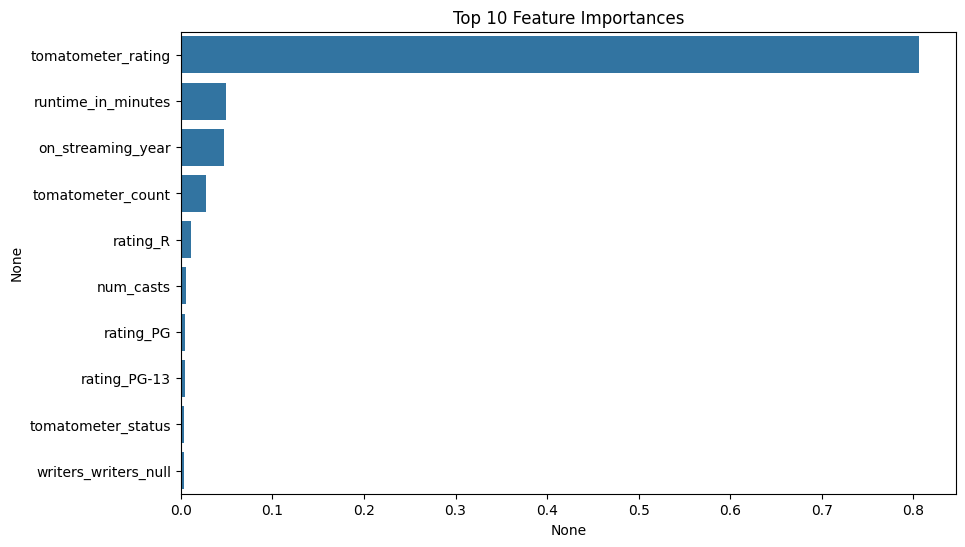

In [58]:
from sklearn.model_selection import cross_val_score
# Cross-validation for best model
cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f'\nCross-validated R2 scores: {cross_val_scores}\nMean Cross-validated R2 score: {np.mean(cross_val_scores):.2f}\n')

# Feature importance for tree-based models
if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    importance = best_model.named_steps['regressor'].feature_importances_
    feature_names = numerical_cols.tolist() + list(best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols))
    feature_importances = pd.Series(importance, index=feature_names)

    top_features = feature_importances.sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_features, y=top_features.index)
    plt.title('Top 10 Feature Importances')
    plt.show()


**Summary of Model Performance and Best Model Identification**

<ipython-input-59-b75bcc350f93>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')


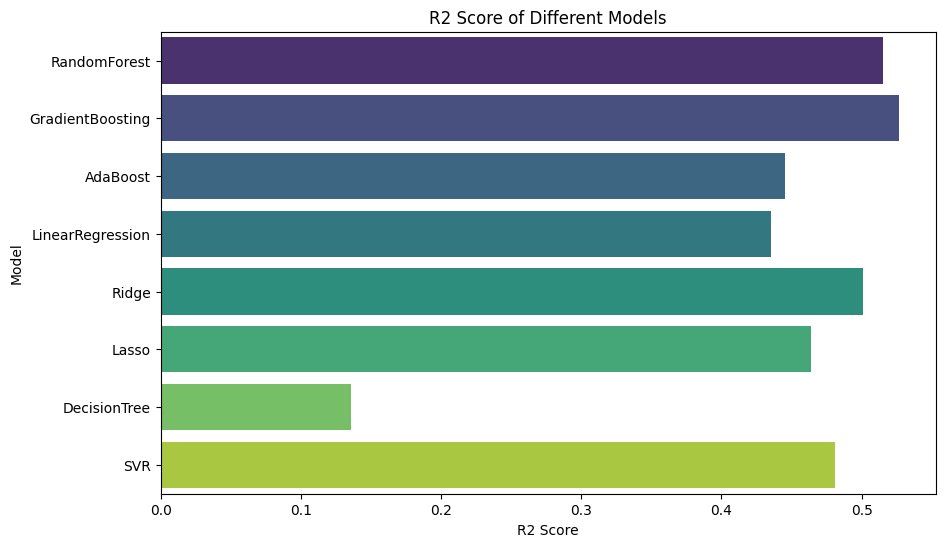


Overall Model Results:

              Model         MSE        MAE        R2
1  GradientBoosting  197.899943  11.188252  0.526458
0      RandomForest  202.551073  11.075485  0.515328
4             Ridge  208.420286  11.323606  0.501284
7               SVR  216.971371  11.357742  0.480823
5             Lasso  224.074057  12.080760  0.463827
2          AdaBoost  231.816817  12.608415  0.445300
3  LinearRegression  235.854735  12.042916  0.435638
6      DecisionTree  361.269677  14.730323  0.135540

Best Model: GradientBoostingRegressor with R2 Score: 0.53


In [59]:
# Summary of Model Performance
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')
plt.title('R2 Score of Different Models')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

# Print the best model based on R2 score
best_model_name = best_model.named_steps['regressor'].__class__.__name__
best_model_r2 = best_r2_score

print("\nOverall Model Results:\n")
print(results_df.sort_values(by='R2', ascending=False))

print(f"\nBest Model: {best_model_name} with R2 Score: {best_model_r2:.2f}")


## Conclusion

In this project, we evaluated multiple regression models to predict audience ratings based on a variety of movie features. The models tested include GradientBoosting, RandomForest, Ridge, SVR, Lasso, AdaBoost, LinearRegression, and DecisionTree.

After assessing the models on key performance metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2), we concluded the following:

- The **GradientBoostingRegressor** outperforms all other models with an R2 score of **0.53**.
- The **RandomForest** and **Ridge** models follow closely with R2 scores of **0.51** and **0.50**, respectively.
- The **DecisionTree** model performed poorly with an R2 score of just **0.14**, indicating that tree depth and feature interactions might not be adequately tuned.

Based on the performance metrics, the **GradientBoostingRegressor** is the best model for this task, showing the highest predictive accuracy for audience ratings. Further fine-tuning and model optimization can still enhance these results.